In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", message="'force_all_finite' was renamed")
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# data imports

In [2]:
np.random.seed(42)

In [3]:
energy_complete = pd.read_csv('recs2020.csv')

In [4]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
1      100002      SOUTH  West South Central           5           AR   
2      100003       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
4      100005  NORTHEAST     Middle Atlantic          34           NJ   
...       ...        ...                 ...         ...          ...   
18491  118492      SOUTH      South Atlantic          24           MD   
18492  118493  NORTHEAST         New England          23           ME   
18493  118494      SOUTH  West South Central          48           TX   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
1            Arkansas  Mixed-Humid                4A       U   3766  ...   
2          New Mexico    Mixed-Dry                4B       U   3819  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
4          New Jersey  Mixed-Humid                4A       U   4219  ...   
...               ...          ...               ...     ...    ...  ...   
18491        Maryland  Mixed-Humid                4A       U   4572  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18493           Texas    Hot-Humid                2A       U    405  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
1            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
2            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
4            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18491        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18493        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
1           -2.0       -2.0       -2.0        -2.0  
2           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
4           -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18491       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18493       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[18496 rows x 799 columns]

In [5]:
energy_complete.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'STATE_FIPS', 'state_postal',
       'state_name', 'BA_climate', 'IECC_climate_code', 'UATYP10', 'HDD65',
       ...
       'EVCHRGHOME', 'EVCHRGAPT', 'EVCHRGWKS', 'EVCHRGBUS', 'EVCHRGMUNI',
       'EVCHRGDLR', 'EVCHRGHWY', 'EVCHRGOTH', 'EVHOMEAMT', 'EVCHRGTYPE'],
      dtype='object', length=799)

In [6]:
energy_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18496 entries, 0 to 18495
Columns: 799 entries, DOEID to EVCHRGTYPE
dtypes: float64(243), int64(549), object(7)
memory usage: 112.7+ MB


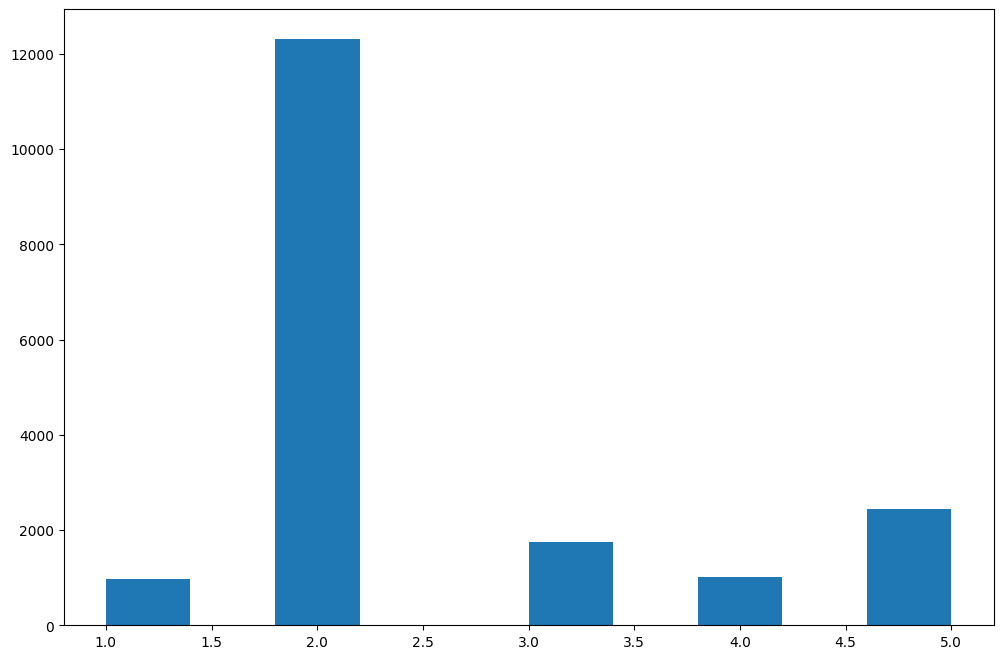

In [7]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [8]:
energy_complete = energy_complete[energy_complete['TYPEHUQ'] == 2.0]

In [9]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
5      100006      SOUTH  West South Central          48           TX   
6      100007      SOUTH  West South Central          40           OK   
10     100011       WEST             Pacific           6           CA   
...       ...        ...                 ...         ...          ...   
18488  118489      SOUTH      South Atlantic          12           FL   
18489  118490      SOUTH      South Atlantic          51           VA   
18492  118493  NORTHEAST         New England          23           ME   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
5               Texas    Hot-Humid                2A       U    901  ...   
6            Oklahoma  Mixed-Humid                3A       U   3148  ...   
10         California      Hot-Dry                3B       U   1467  ...   
...               ...          ...               ...     ...    ...  ...   
18488         Florida    Hot-Humid                2A       R    184  ...   
18489        Virginia  Mixed-Humid                4A       R   4856  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
5            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
6            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
10           -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18488        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18489        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
5           -2.0       -2.0       -2.0        -2.0  
6           -2.0       -2.0       -2.0        -2.0  
10          -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18488       -2.0       -2.0       -2.0        -2.0  
18489       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[12319 rows x 799 columns]

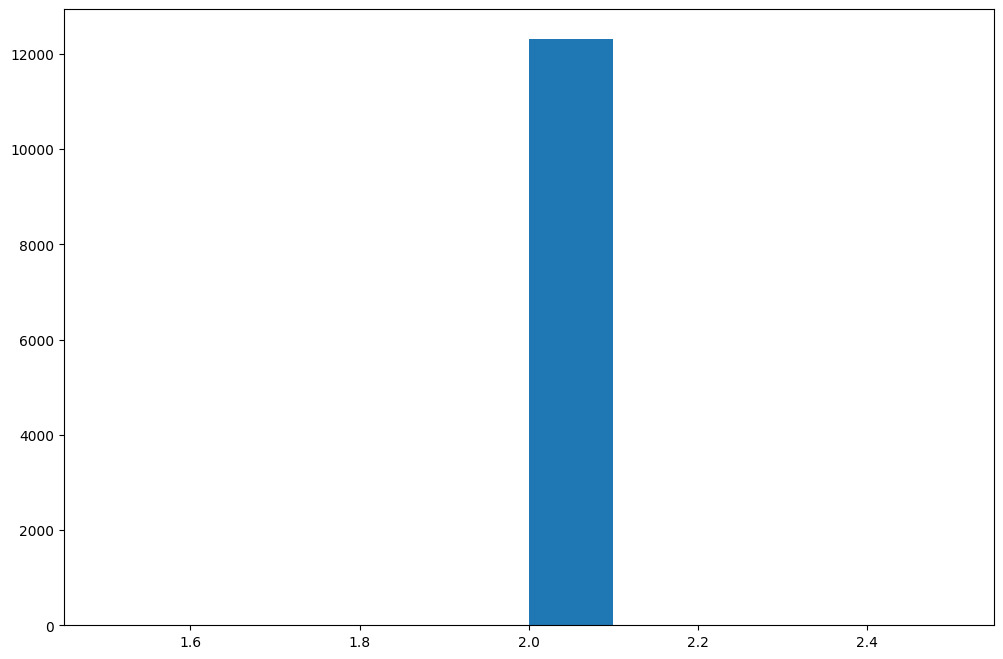

In [10]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [11]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
5      100006      SOUTH  West South Central          48           TX   
6      100007      SOUTH  West South Central          40           OK   
10     100011       WEST             Pacific           6           CA   
...       ...        ...                 ...         ...          ...   
18488  118489      SOUTH      South Atlantic          12           FL   
18489  118490      SOUTH      South Atlantic          51           VA   
18492  118493  NORTHEAST         New England          23           ME   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
5               Texas    Hot-Humid                2A       U    901  ...   
6            Oklahoma  Mixed-Humid                3A       U   3148  ...   
10         California      Hot-Dry                3B       U   1467  ...   
...               ...          ...               ...     ...    ...  ...   
18488         Florida    Hot-Humid                2A       R    184  ...   
18489        Virginia  Mixed-Humid                4A       R   4856  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
5            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
6            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
10           -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18488        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18489        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
5           -2.0       -2.0       -2.0        -2.0  
6           -2.0       -2.0       -2.0        -2.0  
10          -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18488       -2.0       -2.0       -2.0        -2.0  
18489       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[12319 rows x 799 columns]

* 0 Not imputed
* 1 Imputed amount and cost
* 2 Imputed only amount for SOLAR=1 cases

In [12]:
energy_complete['ZELAMOUNT'].value_counts() # electricty

ZELAMOUNT
0    11054
1      893
2      372
Name: count, dtype: int64

* 0 Not imputed
* 1 Imputed amount and cost
* -2 Not applicable, no natural gas use

In [13]:
energy_complete['ZNGAMOUNT'].value_counts() # gas

ZNGAMOUNT
 0    7012
-2    4565
 1     742
Name: count, dtype: int64

* 0 Not imputed
* 1 Imputed amount and cost
* -2 Not applicable, no propane use

In [14]:
energy_complete['ZLPAMOUNT'].value_counts() # propane

ZLPAMOUNT
-2    10703
 1      843
 0      773
Name: count, dtype: int64

* 0 Not imputed
* 1 Imputed amount and cost
* -2 Not applicable, no fuel oil/kerosene use

In [15]:
energy_complete['ZFOAMOUNT'].value_counts() # oil/kerosene

ZFOAMOUNT
-2    11339
 0      561
 1      419
Name: count, dtype: int64

In [16]:
cols_to_keep = [ 
                # Electricity usage measured in kilowatt-hours
                'KWHSPH', # Calibrated electricity usage for space heating, main and secondary, in kilowatt-hours, 2020
                'KWHCOL', # Calibrated electricity usage for space cooling (central air conditioning, individual units, and evaporative coolers), in kilowatthours, 2020
                'KWHAHUHEAT', # Calibrated electricity usage for distributing space heating via furnace fans and boiler pumps, in kilowatt-hours, 2020
                'KWHAHUCOL', # Calibrated electricity usage for furnace fans used for cooling, in kilowatt-hours, 2020
                'KWHWTH', # Calibrated electricity usage for water heating, main and secondary, in kilowatthours, 2020 
                'KWHRFG', # Calibrated electricity usage for all refrigerators, in kilowatthours, 2020
                'KWHFRZ', # Calibrated electricity usage for freezers, in kilowatt-hours, 2020
                'KWHCOK', # Calibrated electricity usage for cooking (cooktops, ovens, and ranges), in kilowatt-hours, 2020
                'KWHMICRO', # Calibrated electricity usage for microwaves, in kilowatt-hours, 2020
                'KWHCW', # Calibrated electricity usage for clothes washers, in kilowatt-hours, 2020
                'KWHCDR', # Calibrated electricity usage for clothes dryers, in kilowatt-hours, 2020
                'KWHDWH', # Calibrated electricity usage for dishwashers, in kilowatt-hours, 2020
                'KWHTVREL', # Calibrated electricity usage for televisions and related peripherals, in kilowatt-hours, 2020

                
                # Gas usage measured in thousand BTU
                'BTUNGSPH', # Calibrated natural gas usage for space heating, main and secondary, in thousand Btu, 2020
                'BTUNGWTH', # Calibrated natural gas usage for water heating, main and secondary, in thousand Btu, 2020
                'BTUNGCOK', # Calibrated natural gas usage for cooking (cooktops, ovens, and ranges), in thousand Btu, 2020
                'BTUNGCDR', # Calibrated natural gas usage for clothes dryers, in thousand Btu, 2020
                

                'TOTSQFT_EN' # Total energy-consuming area (square footage) of the housing unit. Includes all main living areas; all basements; heated, cooled, or finished attics; and heating or cooled garages
]

In [17]:
energy = energy_complete[cols_to_keep].copy()

In [18]:
energy['Tot_heating_elec'] = energy['KWHSPH'] + energy['KWHAHUHEAT']

In [19]:
energy['Tot_cooling_elec'] = energy['KWHCOL'] + energy['KWHAHUCOL']

In [20]:
energy['Tot_refrigeretor_elec'] = energy['KWHRFG'] + energy['KWHFRZ']

In [21]:
energy['Tot_cooking_elec'] = energy['KWHCOK'] + energy['KWHMICRO']

In [22]:
energy['Tot_appliances_elec'] = energy['KWHCW'] + energy['KWHCDR'] + energy['KWHDWH'] + energy['KWHTVREL']

In [23]:
energy.rename(columns={'KWHWTH':'Tot_waterheat_elec', 'BTUNGSPH':'Tot_heating_gas',
                       'BTUNGWTH':'Tot_waterheat_gas','BTUNGCOK':'Tot_cooking_gas',
                       'BTUNGCDR':'Tot_appliances_gas'},inplace=True)

In [24]:
gas_cols = ['Tot_heating_gas', 'Tot_waterheat_gas', 'Tot_cooking_gas', 'Tot_appliances_gas']

# conversion from kBtu to kWh
for col in gas_cols:
    energy[col] = energy[col] * 0.29307107

In [25]:
energy.drop([
            'KWHSPH', # Calibrated electricity usage for space heating, main and secondary, in kilowatt-hours, 2020
            'KWHCOL', # Calibrated electricity usage for space cooling (central air conditioning, individual units, and evaporative coolers), in kilowatthours, 2020
            'KWHAHUHEAT', # Calibrated electricity usage for distributing space heating via furnace fans and boiler pumps, in kilowatt-hours, 2020
            'KWHAHUCOL', # Calibrated electricity usage for furnace fans used for cooling, in kilowatt-hours, 2020
            'KWHRFG', # Calibrated electricity usage for all refrigerators, in kilowatthours, 2020
            'KWHFRZ', # Calibrated electricity usage for freezers, in kilowatt-hours, 2020
            'KWHCOK', # Calibrated electricity usage for cooking (cooktops, ovens, and ranges), in kilowatt-hours, 2020
            'KWHMICRO', # Calibrated electricity usage for microwaves, in kilowatt-hours, 2020
            'KWHCW', # Calibrated electricity usage for clothes washers, in kilowatt-hours, 2020
            'KWHCDR', # Calibrated electricity usage for clothes dryers, in kilowatt-hours, 2020
            'KWHDWH', # Calibrated electricity usage for dishwashers, in kilowatt-hours, 2020
            'KWHTVREL', # Calibrated electricity usage for televisions and related peripherals, in kilowatt-hours, 2020
],axis=1,inplace=True)

In [26]:
energy

Tot_waterheat_elec  Tot_heating_gas  Tot_waterheat_gas  \
0                    0.00     21670.313811        6225.222242   
3                    0.00      9552.812716        6172.431350   
5                    0.00      4267.522148        5717.294909   
6                    0.00     20104.854175        4064.154271   
10                   0.00      6511.672837        2997.809321   
...                   ...              ...                ...   
18488             1761.98         0.000000           0.000000   
18489              261.84         0.000000           0.000000   
18492                0.00         0.000000           0.000000   
18494             1603.47         0.000000           0.000000   
18495             1711.36         0.000000           0.000000   

       Tot_cooking_gas  Tot_appliances_gas  TOTSQFT_EN  Tot_heating_elec  \
0          1975.559845            0.000000        2100            309.06   
3           428.434736            0.000000        2100           3308.71   
5             0.000000          692.597275        4520             89.56   
6             0.000000            0.000000        2100           3751.47   
10            0.000000            0.000000        1630            161.44   
...                ...                 ...         ...               ...   
18488         0.000000            0.000000        2490              0.00   
18489         0.000000            0.000000        1850            573.89   
18492         0.000000            0.000000        3070           1468.09   
18494         0.000000            0.000000        3000           1469.98   
18495         0.000000            0.000000        2000          10382.86   

       Tot_cooling_elec  Tot_refrigeretor_elec  Tot_cooking_elec  \
0               3920.66                1767.81            374.14   
3               1760.83                 965.40            473.72   
5               8272.06                1374.54           1315.51   
6               5675.82                 707.12            540.04   
10              2767.98                1310.01            129.82   
...                 ...                    ...               ...   
18488           4602.96                1887.11            449.72   
18489            121.95                 120.09             72.50   
18492            938.13                 610.62            254.21   
18494           6742.96                2140.54            196.55   
18495           3826.94                1123.52            429.52   

       Tot_appliances_elec  
0                  3847.64  
3                  1718.97  
5                   632.31  
6                  1902.81  
10                  641.97  
...                    ...  
18488              1643.96  
18489               228.00  
18492               527.51  
18494               511.59  
18495              1214.79  

[12319 rows x 11 columns]

<Axes: >

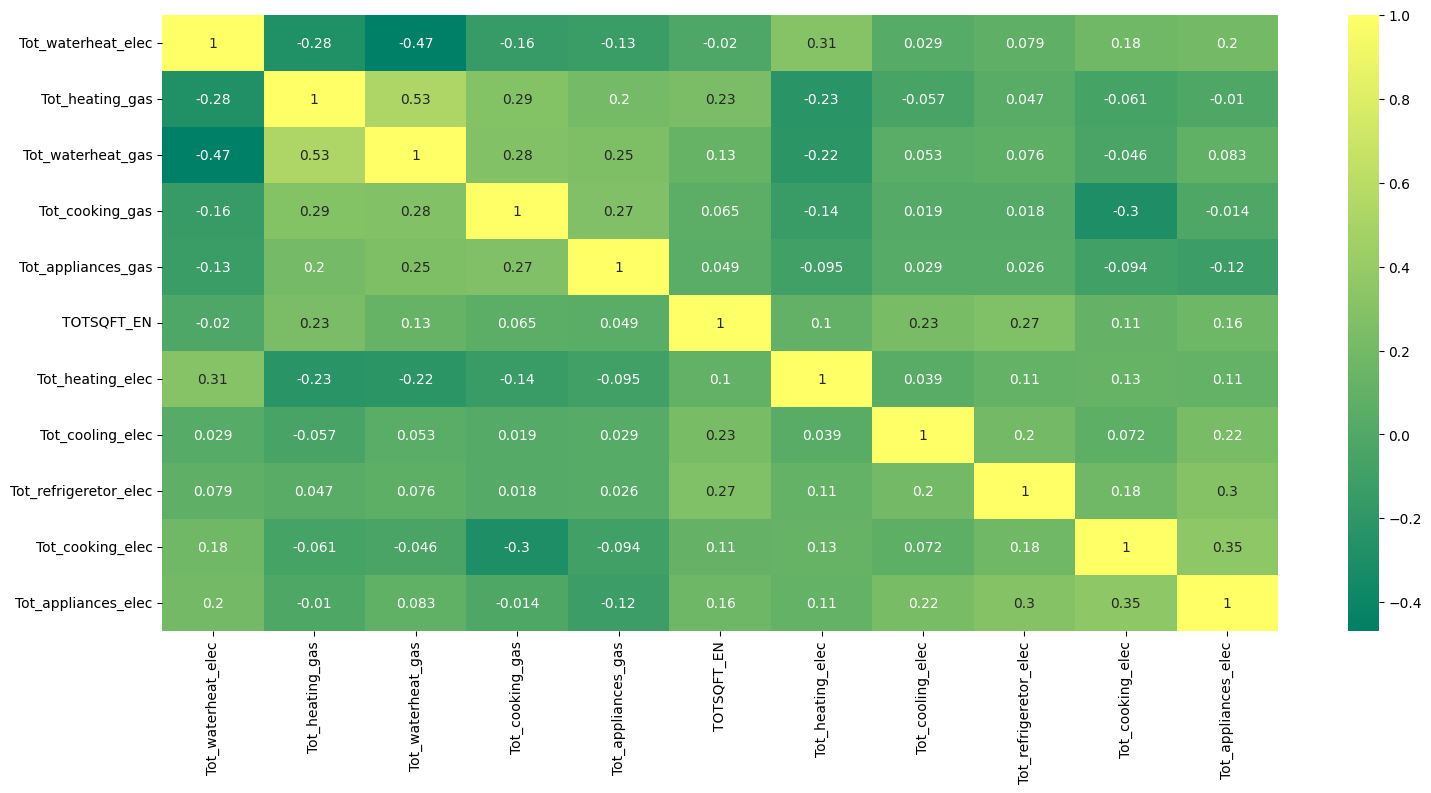

In [27]:
plt.figure(figsize=(18,8))
sns.heatmap(energy.corr(),cmap='summer',annot=True)

In [28]:
for col in energy.columns:
    if col != 'TOTSQFT_EN':
        energy[col + '_EUI'] = energy[col] / energy['TOTSQFT_EN']

In [29]:
energy.drop('TOTSQFT_EN',axis=1,inplace=True)

In [30]:
for col in energy.columns:
    if 'EUI' not in col:
        energy.drop(col,axis=1,inplace=True)

In [31]:
energy

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                    0.000000            10.319197               2.964392   
3                    0.000000             4.548958               2.939253   
5                    0.000000             0.944142               1.264888   
6                    0.000000             9.573740               1.935312   
10                   0.000000             3.994891               1.839147   
...                       ...                  ...                    ...   
18488                0.707622             0.000000               0.000000   
18489                0.141535             0.000000               0.000000   
18492                0.000000             0.000000               0.000000   
18494                0.534490             0.000000               0.000000   
18495                0.855680             0.000000               0.000000   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 0.940743                0.000000              0.147171   
3                 0.204017                0.000000              1.575576   
5                 0.000000                0.153229              0.019814   
6                 0.000000                0.000000              1.786414   
10                0.000000                0.000000              0.099043   
...                    ...                     ...                   ...   
18488             0.000000                0.000000              0.000000   
18489             0.000000                0.000000              0.310211   
18492             0.000000                0.000000              0.478205   
18494             0.000000                0.000000              0.489993   
18495             0.000000                0.000000              5.191430   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  1.866981                   0.841814              0.178162   
3                  0.838490                   0.459714              0.225581   
5                  1.830102                   0.304102              0.291042   
6                  2.702771                   0.336724              0.257162   
10                 1.698147                   0.803687              0.079644   
...                     ...                        ...                   ...   
18488              1.848578                   0.757876              0.180610   
18489              0.065919                   0.064914              0.039189   
18492              0.305580                   0.198899              0.082805   
18494              2.247653                   0.713513              0.065517   
18495              1.913470                   0.561760              0.214760   

       Tot_appliances_elec_EUI  
0                     1.832210  
3                     0.818557  
5                     0.139892  
6                     0.906100  
10                    0.393847  
...                        ...  
18488                 0.660225  
18489                 0.123243  
18492                 0.171827  
18494                 0.170530  
18495                 0.607395  

[12319 rows x 10 columns]

<Axes: >

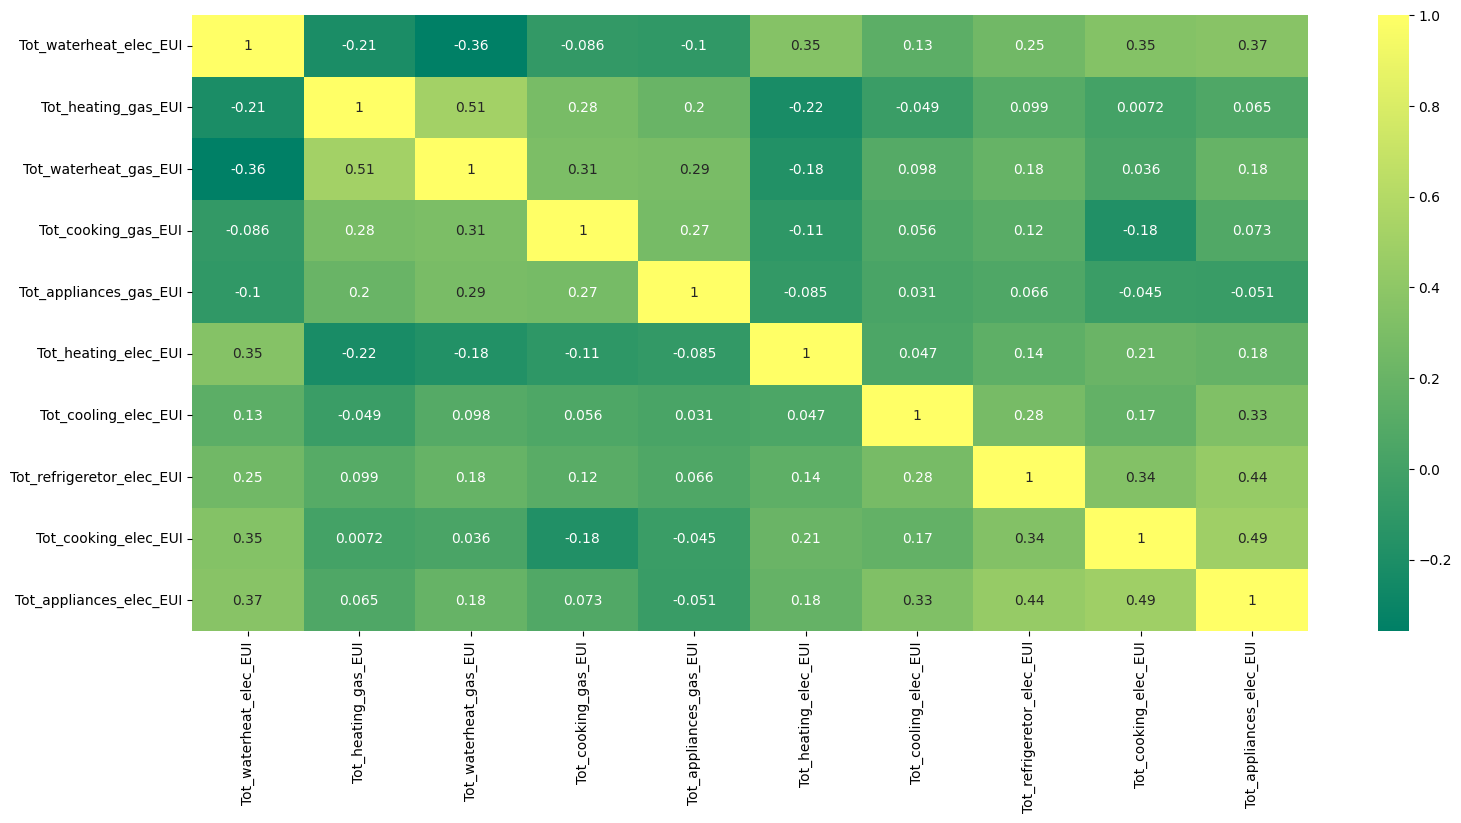

In [32]:
plt.figure(figsize=(18,8))
sns.heatmap(energy.corr(),cmap='summer',annot=True)

# data standardization

In [33]:
energy

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                    0.000000            10.319197               2.964392   
3                    0.000000             4.548958               2.939253   
5                    0.000000             0.944142               1.264888   
6                    0.000000             9.573740               1.935312   
10                   0.000000             3.994891               1.839147   
...                       ...                  ...                    ...   
18488                0.707622             0.000000               0.000000   
18489                0.141535             0.000000               0.000000   
18492                0.000000             0.000000               0.000000   
18494                0.534490             0.000000               0.000000   
18495                0.855680             0.000000               0.000000   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 0.940743                0.000000              0.147171   
3                 0.204017                0.000000              1.575576   
5                 0.000000                0.153229              0.019814   
6                 0.000000                0.000000              1.786414   
10                0.000000                0.000000              0.099043   
...                    ...                     ...                   ...   
18488             0.000000                0.000000              0.000000   
18489             0.000000                0.000000              0.310211   
18492             0.000000                0.000000              0.478205   
18494             0.000000                0.000000              0.489993   
18495             0.000000                0.000000              5.191430   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  1.866981                   0.841814              0.178162   
3                  0.838490                   0.459714              0.225581   
5                  1.830102                   0.304102              0.291042   
6                  2.702771                   0.336724              0.257162   
10                 1.698147                   0.803687              0.079644   
...                     ...                        ...                   ...   
18488              1.848578                   0.757876              0.180610   
18489              0.065919                   0.064914              0.039189   
18492              0.305580                   0.198899              0.082805   
18494              2.247653                   0.713513              0.065517   
18495              1.913470                   0.561760              0.214760   

       Tot_appliances_elec_EUI  
0                     1.832210  
3                     0.818557  
5                     0.139892  
6                     0.906100  
10                    0.393847  
...                        ...  
18488                 0.660225  
18489                 0.123243  
18492                 0.171827  
18494                 0.170530  
18495                 0.607395  

[12319 rows x 10 columns]

In [34]:
scaler = StandardScaler()

In [35]:
energy_scaled = scaler.fit_transform(energy)

In [36]:
np.mean(energy_scaled),np.std(energy_scaled)

(1.6496081047762697e-17, 1.0)

In [37]:
energy_scaled = pd.DataFrame(energy_scaled,columns=energy.columns)

In [38]:
energy_scaled

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                   -0.518605             1.036710               0.712677   
1                   -0.518605             0.022685               0.700733   
2                   -0.518605            -0.610802              -0.094832   
3                   -0.518605             0.905708               0.223716   
4                   -0.518605            -0.074683               0.178024   
...                       ...                  ...                    ...   
12314                0.002562            -0.776720              -0.695837   
12315               -0.414364            -0.776720              -0.695837   
12316               -0.518605            -0.776720              -0.695837   
12317               -0.124951            -0.776720              -0.695837   
12318                0.111607            -0.776720              -0.695837   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 3.254780               -0.294753             -0.451513   
1                 0.361211               -0.294753              0.417658   
2                -0.440085                0.552061             -0.529009   
3                -0.440085               -0.294753              0.545950   
4                -0.440085               -0.294753             -0.480799   
...                    ...                     ...                   ...   
12314            -0.440085               -0.294753             -0.541066   
12315            -0.440085               -0.294753             -0.352305   
12316            -0.440085               -0.294753             -0.250082   
12317            -0.440085               -0.294753             -0.242909   
12318            -0.440085               -0.294753              2.617870   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  0.390188                   0.501495              0.025226   
1                 -0.329103                  -0.372616              0.285323   
2                  0.364396                  -0.728603              0.644382   
3                  0.974712                  -0.653975              0.458547   
4                  0.272112                   0.414273             -0.515152   
...                     ...                        ...                   ...   
12314              0.377318                   0.309472              0.038656   
12315             -0.869413                  -1.275782             -0.737050   
12316             -0.701802                  -0.969270             -0.497817   
12317              0.656418                   0.207987             -0.592642   
12318              0.422701                  -0.139171              0.225969   

       Tot_appliances_elec_EUI  
0                     1.702697  
1                     0.136646  
2                    -0.911863  
3                     0.271896  
4                    -0.519513  
...                        ...  
12314                -0.107970  
12315                -0.937584  
12316                -0.862524  
12317                -0.864528  
12318                -0.189590  

[12319 rows x 10 columns]

# dimensionality reduction algorithms

## pca 

In [39]:
pca_general = PCA()

In [40]:
pca_general.fit(energy_scaled)

PCA()

In [41]:
explained_variance = pca_general.explained_variance_ratio_

In [42]:
explained_variance

array([0.24499161, 0.2195998 , 0.10063181, 0.09250301, 0.07885279,
       0.07197834, 0.06072953, 0.05417869, 0.04355903, 0.03297539])

In [43]:
eigenvalues = pca_general.explained_variance_

In [44]:
eigenvalues

array([2.45011504, 2.19617623, 1.00639979, 0.92510515, 0.78859194,
       0.71984182, 0.60734464, 0.5418309 , 0.43562567, 0.32978065])

In [45]:
selected_components = []

for i in eigenvalues:
    if i > 1:
        selected_components.append(i)
    
print(selected_components)

[2.4501150359809456, 2.1961762299017464, 1.0063997929063286]


In [46]:
N_COMPONENTS = len(selected_components)

In [47]:
eigenvectors = pca_general.components_

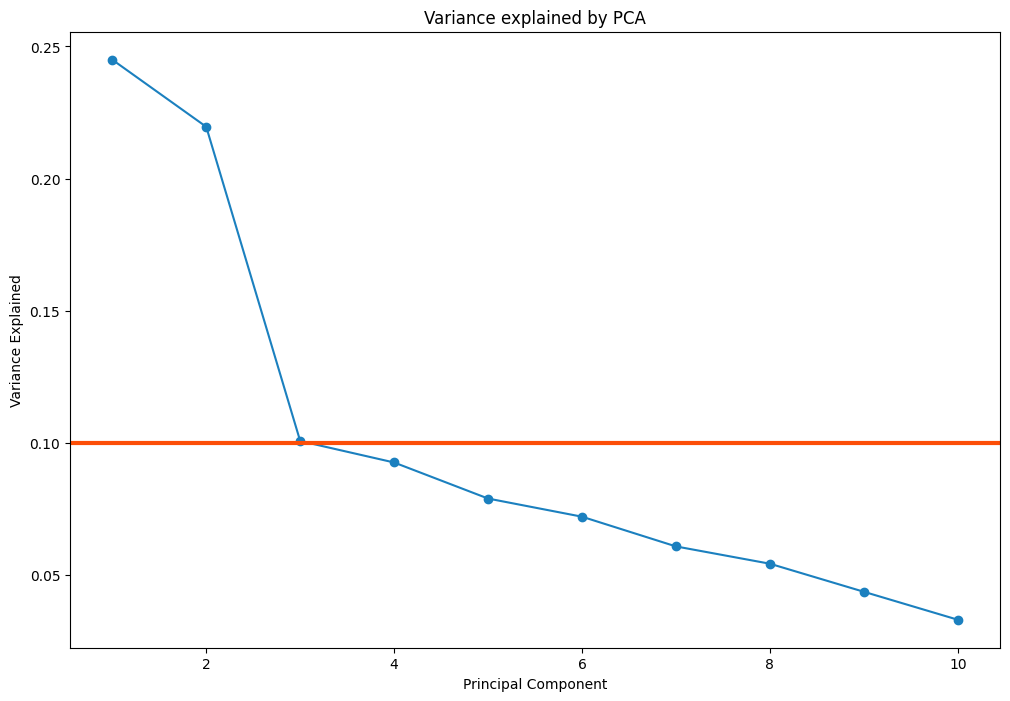

In [48]:
plt.figure(figsize=(12,8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [49]:
pca = PCA(n_components=N_COMPONENTS)

In [50]:
X_pca = pca.fit_transform(energy_scaled)

In [51]:
pca_columns = [f'dim_{i+1}' for i in range(N_COMPONENTS)]

In [52]:
X_pca = pd.DataFrame(X_pca, columns=pca_columns)

In [53]:
X_pca

dim_1     dim_2     dim_3
0     -0.040674  2.820321  0.684454
1     -0.244152  0.316540 -0.256096
2     -0.595915 -0.518675 -0.212329
3      0.197555  0.380670 -0.761742
4     -0.553223 -0.095653 -0.455163
...         ...       ...       ...
12314  0.335709 -0.748509 -0.213732
12315 -1.384495 -1.834541 -0.019789
12316 -1.108424 -1.650076 -0.083421
12317 -0.198478 -1.051451  0.181784
12318  1.352365 -1.334209  0.875923

[12319 rows x 3 columns]

## t-SNE

In [54]:
tsne = TSNE(n_components=3,random_state=42)

In [55]:
X_tsne = tsne.fit_transform(energy_scaled)

In [56]:
tsne_columns = [f'dim_{i+1}' for i in range(3)]

In [57]:
X_tsne = pd.DataFrame(X_tsne, columns=tsne_columns)

In [58]:
X_tsne

dim_1      dim_2      dim_3
0       0.114398  15.308081   3.798611
1      -4.878120   6.875067   0.017055
2      -3.362962  -4.213982 -11.975272
3       5.654139   4.710896  -5.623894
4      -0.038726   3.743821  -3.271671
...          ...        ...        ...
12314   1.112029  -6.681534  -3.629851
12315  -9.000318 -19.503206  -1.040037
12316  -6.394584 -19.827484  -3.920771
12317   3.622711  -6.261943  11.472353
12318  20.509632 -11.151525   8.814960

[12319 rows x 3 columns]

## umap

In [59]:
umap = umap.UMAP(n_components=3,random_state=42)

In [60]:
X_umap = umap.fit_transform(energy_scaled)

In [61]:
umap_columns = [f'dim_{i+1}' for i in range(3)]

In [62]:
X_umap = pd.DataFrame(X_umap, columns=umap_columns)

# clustering algorithms

## k-means 

In [63]:
N_CLUSTER = 3

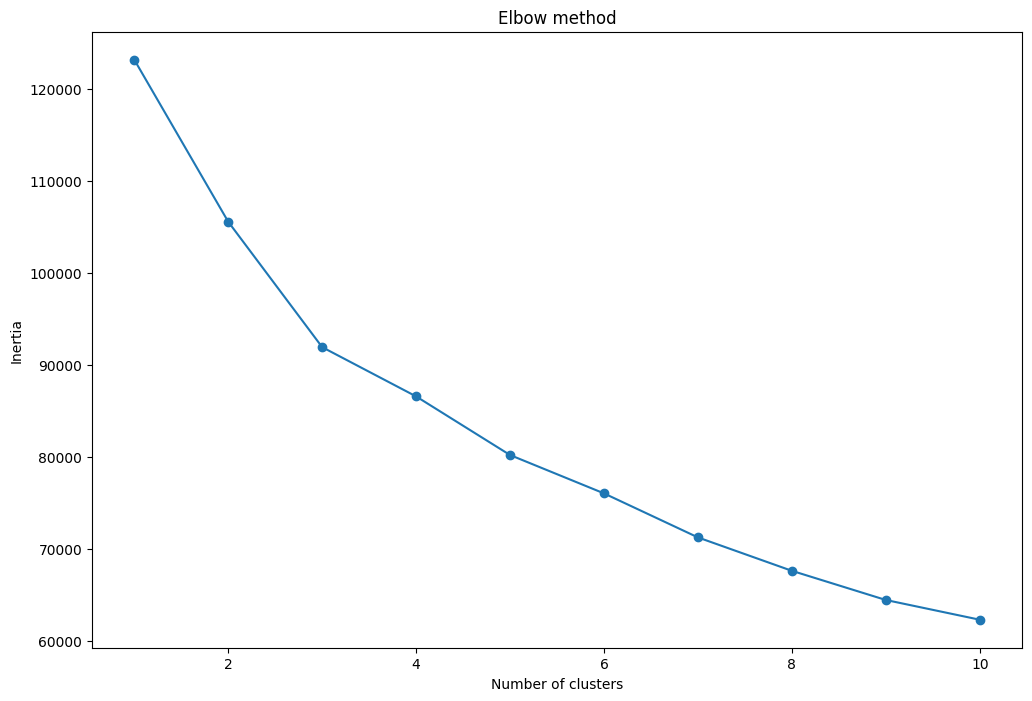

In [64]:
data = energy_scaled
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [66]:
kmeans.fit(energy_scaled)

KMeans(n_clusters=3, random_state=42)

In [67]:
df_kmeans = energy_scaled.copy()

In [68]:
df_kmeans['k_means'] = kmeans.labels_

In [69]:
df_kmeans

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                   -0.518605             1.036710               0.712677   
1                   -0.518605             0.022685               0.700733   
2                   -0.518605            -0.610802              -0.094832   
3                   -0.518605             0.905708               0.223716   
4                   -0.518605            -0.074683               0.178024   
...                       ...                  ...                    ...   
12314                0.002562            -0.776720              -0.695837   
12315               -0.414364            -0.776720              -0.695837   
12316               -0.518605            -0.776720              -0.695837   
12317               -0.124951            -0.776720              -0.695837   
12318                0.111607            -0.776720              -0.695837   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 3.254780               -0.294753             -0.451513   
1                 0.361211               -0.294753              0.417658   
2                -0.440085                0.552061             -0.529009   
3                -0.440085               -0.294753              0.545950   
4                -0.440085               -0.294753             -0.480799   
...                    ...                     ...                   ...   
12314            -0.440085               -0.294753             -0.541066   
12315            -0.440085               -0.294753             -0.352305   
12316            -0.440085               -0.294753             -0.250082   
12317            -0.440085               -0.294753             -0.242909   
12318            -0.440085               -0.294753              2.617870   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  0.390188                   0.501495              0.025226   
1                 -0.329103                  -0.372616              0.285323   
2                  0.364396                  -0.728603              0.644382   
3                  0.974712                  -0.653975              0.458547   
4                  0.272112                   0.414273             -0.515152   
...                     ...                        ...                   ...   
12314              0.377318                   0.309472              0.038656   
12315             -0.869413                  -1.275782             -0.737050   
12316             -0.701802                  -0.969270             -0.497817   
12317              0.656418                   0.207987             -0.592642   
12318              0.422701                  -0.139171              0.225969   

       Tot_appliances_elec_EUI  k_means  
0                     1.702697        2  
1                     0.136646        1  
2                    -0.911863        1  
3                     0.271896        1  
4                    -0.519513        1  
...                        ...      ...  
12314                -0.107970        1  
12315                -0.937584        1  
12316                -0.862524        1  
12317                -0.864528        1  
12318                -0.189590        0  

[12319 rows x 11 columns]

In [70]:
df_kmeans['k_means'].unique()

array([2, 1, 0])

In [71]:
df_kmeans.groupby(df_kmeans['k_means']).mean() 

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
k_means                                                                       
0                      1.369361            -0.597238              -0.621518   
1                     -0.233649            -0.134210              -0.212941   
2                     -0.433488             1.112949               1.444910   

         Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
k_means                                                                      
0                  -0.371192               -0.281560              1.164992   
1                  -0.168021               -0.155163             -0.224436   
2                   1.022776                0.884246             -0.268397   

         Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  \
k_means                                                    
0                    0.509862                   0.762188   
1                   -0.209710                  -0.351442   
2                    0.318763                   0.625004   

         Tot_cooking_elec_EUI  Tot_appliances_elec_EUI  
k_means                                                 
0                    0.984982                 0.854187  
1                   -0.258761                -0.332196  
2                    0.043079                 0.459150

In [72]:
sil = silhouette_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])
ch = calinski_harabasz_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])
db = davies_bouldin_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.28790073670340915
Calinski-Harabasz: 2092.9135088298426
Davies-Bouldin: 1.7403138370431142


### k-means with pca

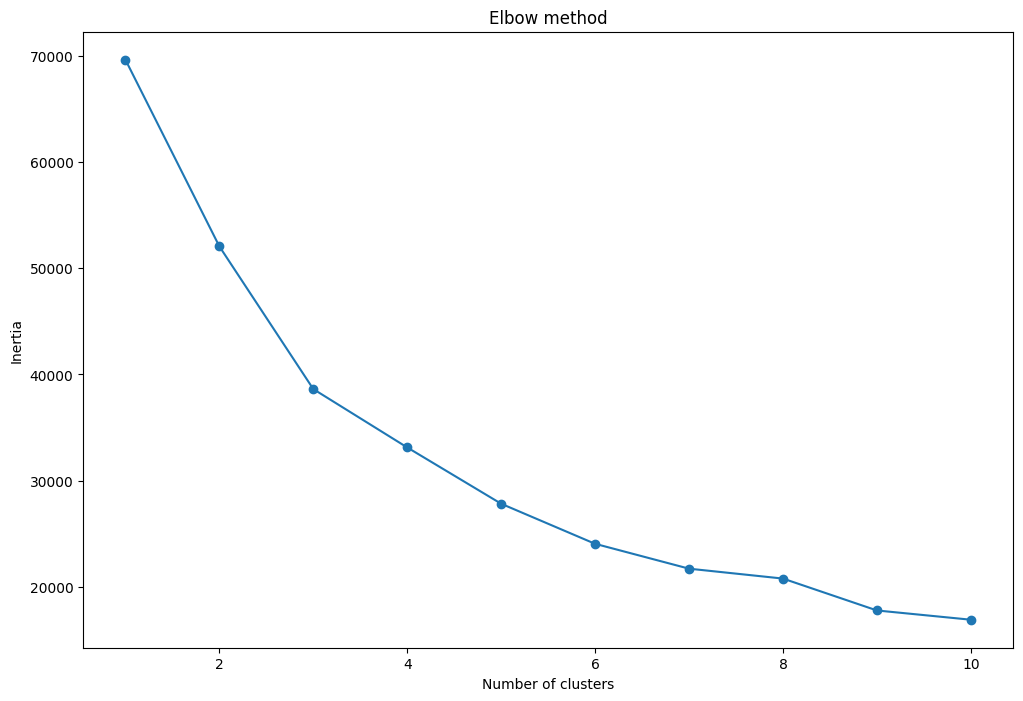

In [73]:
data = X_pca
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [74]:
kmeans_pca = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [75]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [76]:
df_pca_kmeans = X_pca.copy()

In [77]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [78]:
df_pca_kmeans

dim_1     dim_2     dim_3  kmeans_pca
0     -0.040674  2.820321  0.684454           2
1     -0.244152  0.316540 -0.256096           1
2     -0.595915 -0.518675 -0.212329           1
3      0.197555  0.380670 -0.761742           1
4     -0.553223 -0.095653 -0.455163           1
...         ...       ...       ...         ...
12314  0.335709 -0.748509 -0.213732           1
12315 -1.384495 -1.834541 -0.019789           1
12316 -1.108424 -1.650076 -0.083421           1
12317 -0.198478 -1.051451  0.181784           1
12318  1.352365 -1.334209  0.875923           0

[12319 rows x 4 columns]

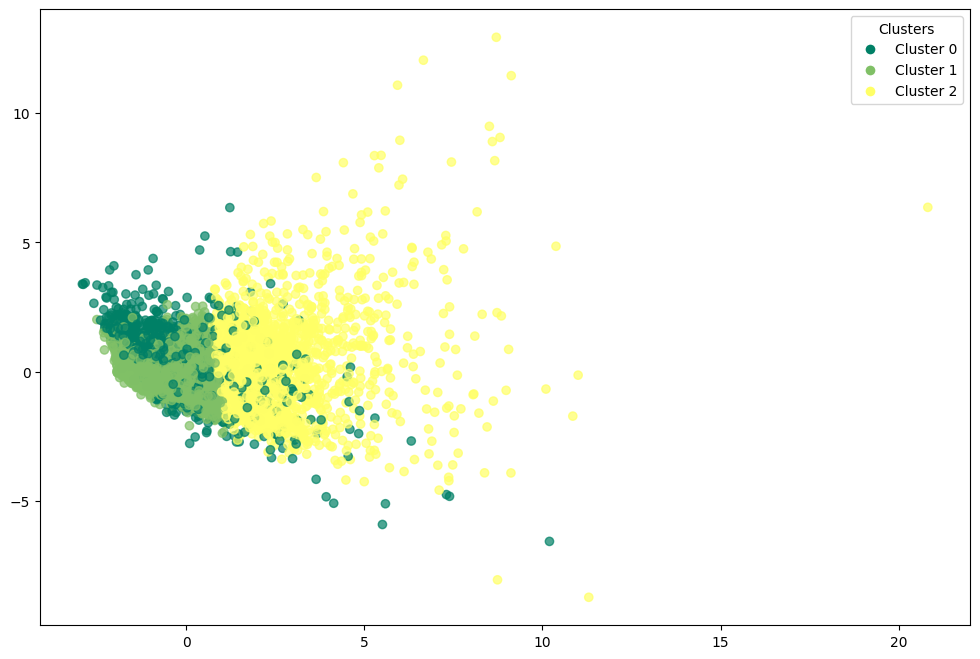

In [79]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_kmeans.iloc[:, 1], df_pca_kmeans.iloc[:, 2], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [80]:
df_pca_kmeans.groupby(df_pca_kmeans['kmeans_pca']).mean() 

dim_1     dim_2     dim_3
kmeans_pca                              
0           2.576043 -0.349322  0.302840
1          -0.514284 -0.540723 -0.128111
2          -0.465772  2.348457  0.198503

In [81]:
sil = silhouette_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])
ch = calinski_harabasz_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])
db = davies_bouldin_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.3861080184690248
Calinski-Harabasz: 4943.543148214565
Davies-Bouldin: 1.0953296554859004


### k-means with t-SNE

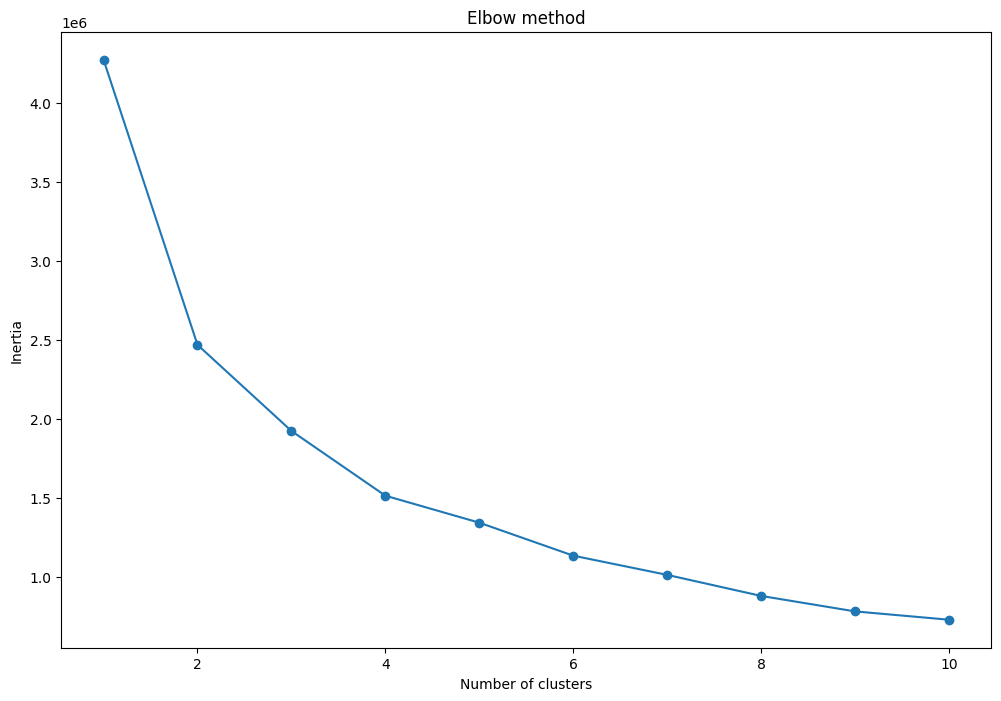

In [82]:
data = X_tsne
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
kmeans_tsne = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [84]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=3, random_state=42)

In [85]:
df_tsne_kmeans = X_tsne.copy()

In [86]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [87]:
df_tsne_kmeans

dim_1      dim_2      dim_3  kmeans_tsne
0       0.114398  15.308081   3.798611            1
1      -4.878120   6.875067   0.017055            1
2      -3.362962  -4.213982 -11.975272            2
3       5.654139   4.710896  -5.623894            1
4      -0.038726   3.743821  -3.271671            1
...          ...        ...        ...          ...
12314   1.112029  -6.681534  -3.629851            2
12315  -9.000318 -19.503206  -1.040037            2
12316  -6.394584 -19.827484  -3.920771            2
12317   3.622711  -6.261943  11.472353            0
12318  20.509632 -11.151525   8.814960            0

[12319 rows x 4 columns]

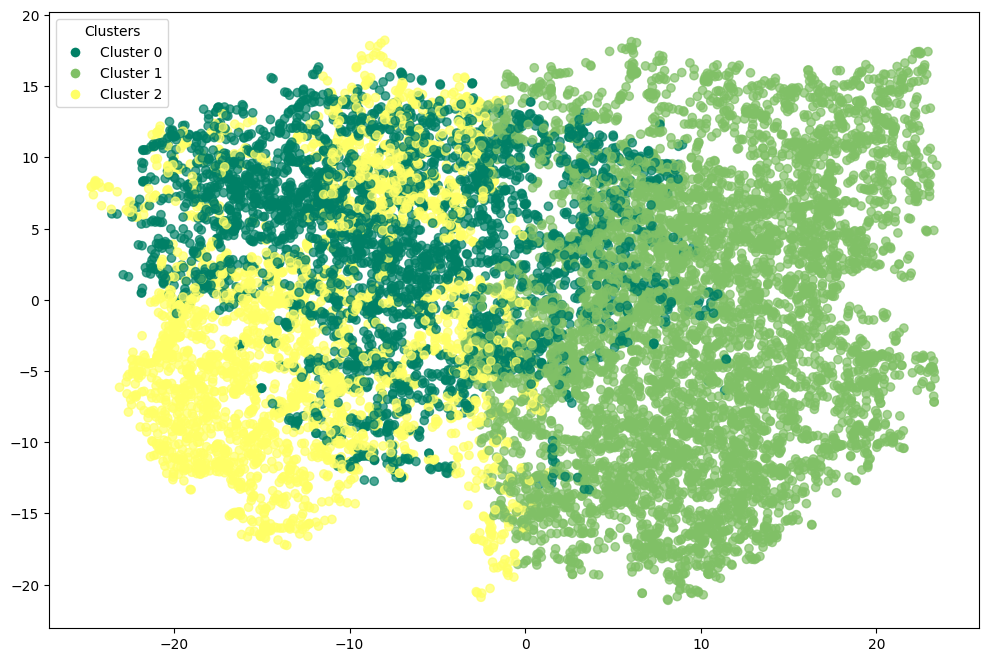

In [88]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 1], df_tsne_kmeans.iloc[:, 2], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [89]:
df_tsne_kmeans.groupby(df_tsne_kmeans['kmeans_tsne']).mean()

dim_1      dim_2     dim_3
kmeans_tsne                                
0            14.288443  -7.211643  3.949909
1            -7.061568   9.822949 -1.533632
2            -2.111444 -11.767839 -1.762722

In [90]:
sil = silhouette_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])
ch = calinski_harabasz_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])
db = davies_bouldin_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.30973610281944275
Calinski-Harabasz: 6797.330009287428
Davies-Bouldin: 1.1899917548486798


### k-means with umap

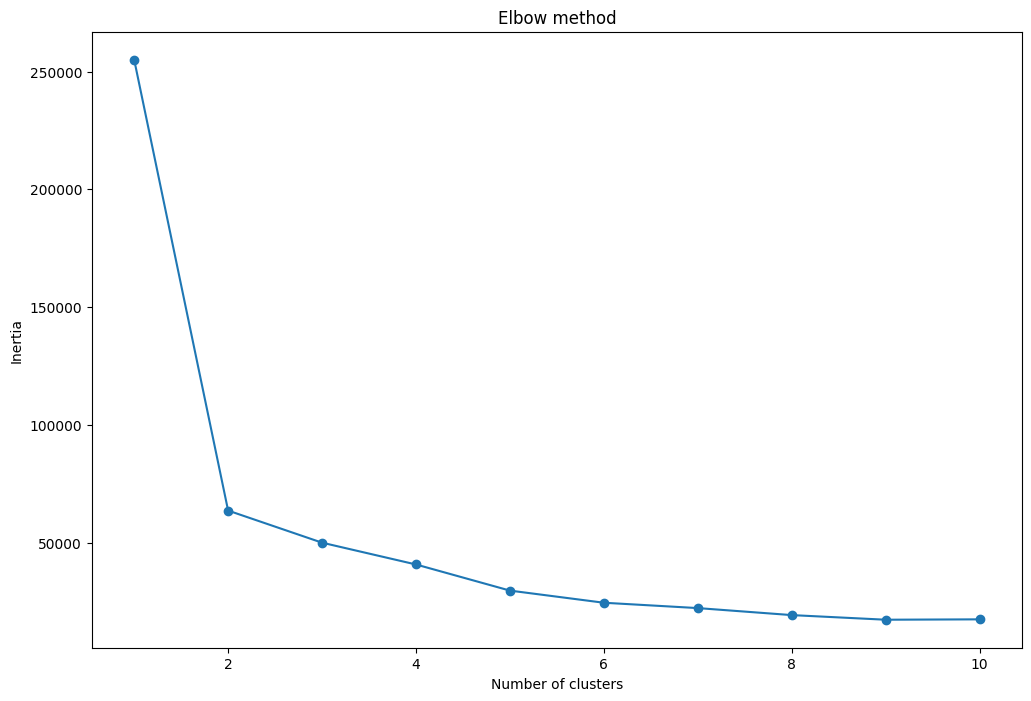

In [91]:
data = X_umap
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [92]:
kmeans_umap = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [93]:
kmeans_umap.fit(X_umap)

KMeans(n_clusters=3, random_state=42)

In [94]:
df_umap_kmeans = X_umap.copy()

In [95]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [96]:
df_umap_kmeans

dim_1     dim_2      dim_3  kmeans_umap
0      8.773307  4.291425   7.520591            1
1      8.937214  5.686240   9.205293            1
2      8.090482  6.291761  10.432554            1
3      8.340221  5.067367  10.147958            1
4      8.194123  5.613099   9.675292            1
...         ...       ...        ...          ...
12314  1.797643  6.107162   7.769608            2
12315 -0.031510  9.054818   6.380892            2
12316  0.021729  8.755672   6.955832            2
12317  2.031036  6.362990   7.087135            2
12318  0.250902  3.322713   6.356452            0

[12319 rows x 4 columns]

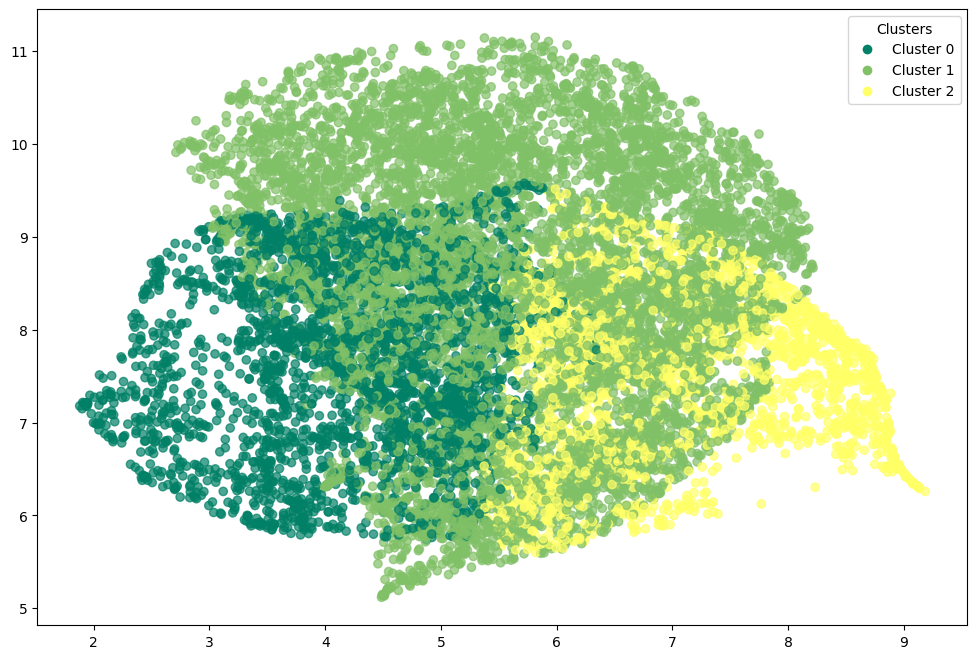

In [97]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_kmeans.iloc[:, 1], df_umap_kmeans.iloc[:, 2], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [98]:
sil = silhouette_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])
ch = calinski_harabasz_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])
db = davies_bouldin_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.5140318274497986
Calinski-Harabasz: 23712.904762478902
Davies-Bouldin: 0.8323353503438881


## Birch

In [99]:
birch = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [100]:
birch.fit(energy_scaled)

Birch(threshold=1.5)

In [101]:
df_birch = energy_scaled.copy()

In [102]:
df_birch['birch'] = birch.labels_

In [103]:
df_birch

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                   -0.518605             1.036710               0.712677   
1                   -0.518605             0.022685               0.700733   
2                   -0.518605            -0.610802              -0.094832   
3                   -0.518605             0.905708               0.223716   
4                   -0.518605            -0.074683               0.178024   
...                       ...                  ...                    ...   
12314                0.002562            -0.776720              -0.695837   
12315               -0.414364            -0.776720              -0.695837   
12316               -0.518605            -0.776720              -0.695837   
12317               -0.124951            -0.776720              -0.695837   
12318                0.111607            -0.776720              -0.695837   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 3.254780               -0.294753             -0.451513   
1                 0.361211               -0.294753              0.417658   
2                -0.440085                0.552061             -0.529009   
3                -0.440085               -0.294753              0.545950   
4                -0.440085               -0.294753             -0.480799   
...                    ...                     ...                   ...   
12314            -0.440085               -0.294753             -0.541066   
12315            -0.440085               -0.294753             -0.352305   
12316            -0.440085               -0.294753             -0.250082   
12317            -0.440085               -0.294753             -0.242909   
12318            -0.440085               -0.294753              2.617870   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  0.390188                   0.501495              0.025226   
1                 -0.329103                  -0.372616              0.285323   
2                  0.364396                  -0.728603              0.644382   
3                  0.974712                  -0.653975              0.458547   
4                  0.272112                   0.414273             -0.515152   
...                     ...                        ...                   ...   
12314              0.377318                   0.309472              0.038656   
12315             -0.869413                  -1.275782             -0.737050   
12316             -0.701802                  -0.969270             -0.497817   
12317              0.656418                   0.207987             -0.592642   
12318              0.422701                  -0.139171              0.225969   

       Tot_appliances_elec_EUI  birch  
0                     1.702697      0  
1                     0.136646      0  
2                    -0.911863      0  
3                     0.271896      0  
4                    -0.519513      0  
...                        ...    ...  
12314                -0.107970      0  
12315                -0.937584      0  
12316                -0.862524      0  
12317                -0.864528      0  
12318                -0.189590      0  

[12319 rows x 11 columns]

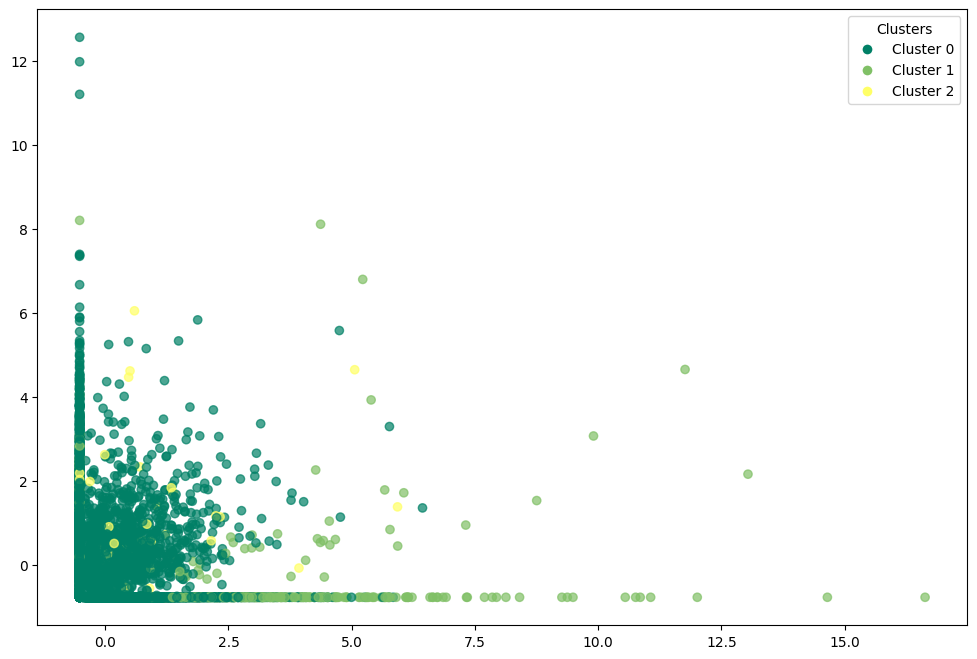

In [104]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_birch.iloc[:, 0], df_birch.iloc[:, 1], 
                      c=df_birch['birch'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_birch['birch'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [105]:
sil = silhouette_score(df_birch.iloc[:,:-1], df_birch['birch'])
ch = calinski_harabasz_score(df_birch.iloc[:,:-1], df_birch['birch'])
db = davies_bouldin_score(df_birch.iloc[:,:-1], df_birch['birch'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.42733476501595935
Calinski-Harabasz: 799.6279034338177
Davies-Bouldin: 1.4164310582887991


### Birch with pca

In [106]:
birch_pca = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [107]:
birch_pca.fit(X_pca)

Birch(threshold=1.5)

In [108]:
df_pca_birch = X_pca.copy()

In [109]:
df_pca_birch["birch_pca"] = birch_pca.labels_

In [110]:
df_pca_birch

dim_1     dim_2     dim_3  birch_pca
0     -0.040674  2.820321  0.684454          1
1     -0.244152  0.316540 -0.256096          1
2     -0.595915 -0.518675 -0.212329          1
3      0.197555  0.380670 -0.761742          1
4     -0.553223 -0.095653 -0.455163          1
...         ...       ...       ...        ...
12314  0.335709 -0.748509 -0.213732          1
12315 -1.384495 -1.834541 -0.019789          1
12316 -1.108424 -1.650076 -0.083421          1
12317 -0.198478 -1.051451  0.181784          1
12318  1.352365 -1.334209  0.875923          1

[12319 rows x 4 columns]

In [111]:
sil = silhouette_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])
ch = calinski_harabasz_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])
db = davies_bouldin_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.6712878745865688
Calinski-Harabasz: 1367.1756867289114
Davies-Bouldin: 0.7832560936081091


### Birch with t-SNE

In [112]:
birch_tsne = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [113]:
birch_tsne.fit(X_tsne)

Birch(threshold=1.5)

In [114]:
df_tsne_birch = X_tsne.copy()

In [115]:
df_tsne_birch['birch_tsne'] = birch_tsne.labels_

In [116]:
df_tsne_birch

dim_1      dim_2      dim_3  birch_tsne
0       0.114398  15.308081   3.798611           2
1      -4.878120   6.875067   0.017055           2
2      -3.362962  -4.213982 -11.975272           1
3       5.654139   4.710896  -5.623894           1
4      -0.038726   3.743821  -3.271671           1
...          ...        ...        ...         ...
12314   1.112029  -6.681534  -3.629851           0
12315  -9.000318 -19.503206  -1.040037           0
12316  -6.394584 -19.827484  -3.920771           0
12317   3.622711  -6.261943  11.472353           0
12318  20.509632 -11.151525   8.814960           0

[12319 rows x 4 columns]

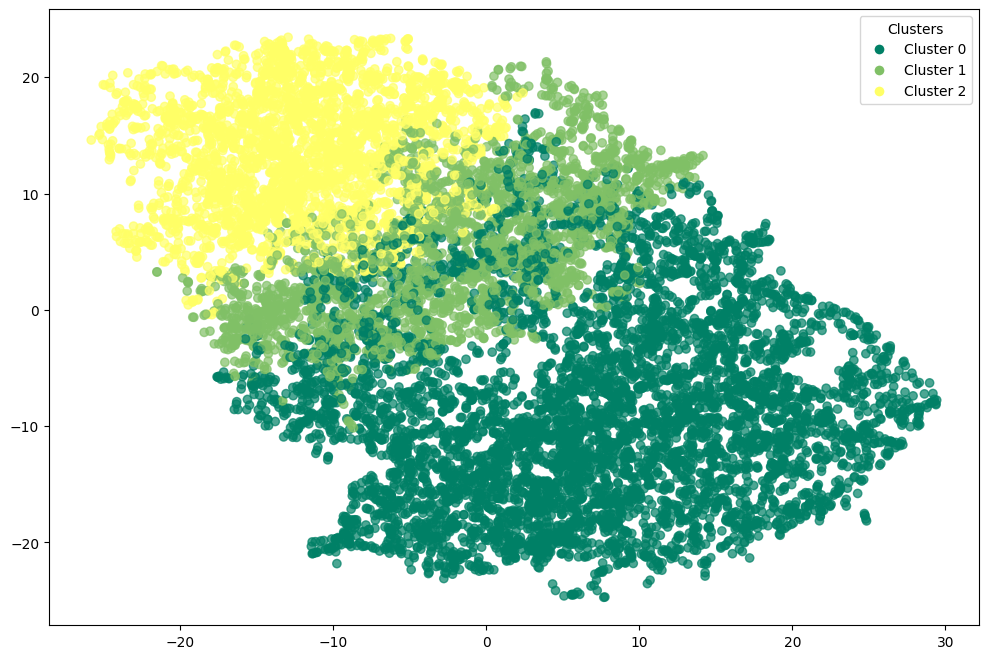

In [117]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_birch.iloc[:, 0], df_tsne_birch.iloc[:, 1], 
                      c=df_tsne_birch['birch_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_birch['birch_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [118]:
sil = silhouette_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])
ch = calinski_harabasz_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])
db = davies_bouldin_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.25988778471946716
Calinski-Harabasz: 5966.626555206892
Davies-Bouldin: 1.2321458818909958


### Birch with umap

In [119]:
birch_umap = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [120]:
birch_umap.fit(X_umap)

Birch(threshold=1.5)

In [121]:
df_umap_birch = X_umap.copy()

In [122]:
df_umap_birch['birch_umap'] = birch_umap.labels_

In [123]:
df_umap_birch

dim_1     dim_2      dim_3  birch_umap
0      8.773307  4.291425   7.520591           1
1      8.937214  5.686240   9.205293           1
2      8.090482  6.291761  10.432554           1
3      8.340221  5.067367  10.147958           1
4      8.194123  5.613099   9.675292           1
...         ...       ...        ...         ...
12314  1.797643  6.107162   7.769608           0
12315 -0.031510  9.054818   6.380892           0
12316  0.021729  8.755672   6.955832           0
12317  2.031036  6.362990   7.087135           0
12318  0.250902  3.322713   6.356452           0

[12319 rows x 4 columns]

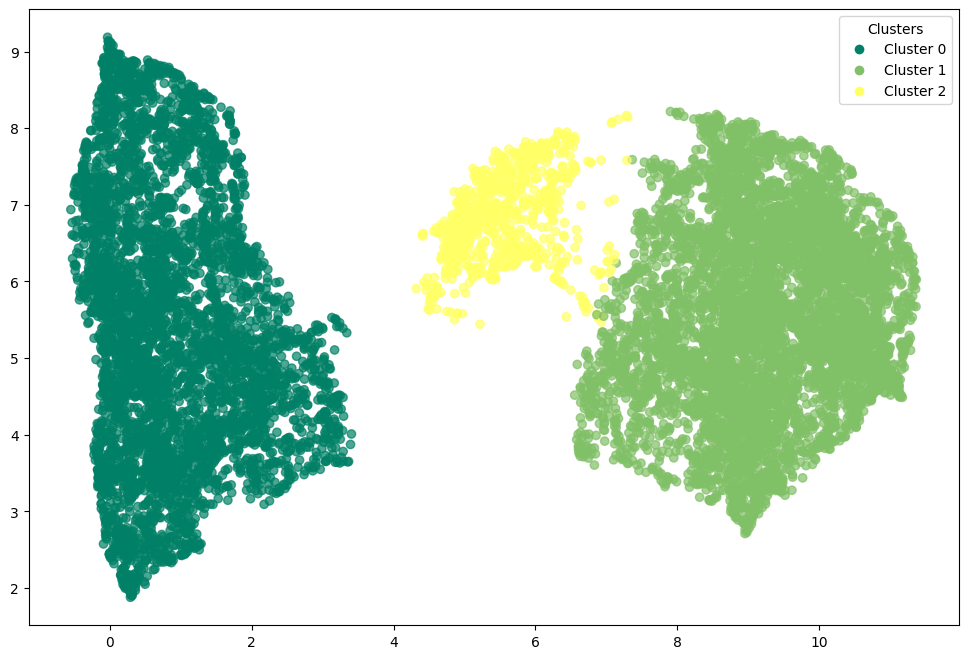

In [124]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_birch.iloc[:, 0], df_umap_birch.iloc[:, 1], 
                      c=df_umap_birch['birch_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_birch['birch_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [125]:
sil = silhouette_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])
ch = calinski_harabasz_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])
db = davies_bouldin_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.42159202694892883
Calinski-Harabasz: 23376.787580912336
Davies-Bouldin: 0.684397183281622


## GMM - Gaussian Mixture Models

In [126]:
gmm = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [127]:
gmm.fit(energy_scaled)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [128]:
df_gmm = energy_scaled.copy()

In [129]:
df_gmm['gmm'] = gmm.predict(energy_scaled)

In [130]:
df_gmm

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                   -0.518605             1.036710               0.712677   
1                   -0.518605             0.022685               0.700733   
2                   -0.518605            -0.610802              -0.094832   
3                   -0.518605             0.905708               0.223716   
4                   -0.518605            -0.074683               0.178024   
...                       ...                  ...                    ...   
12314                0.002562            -0.776720              -0.695837   
12315               -0.414364            -0.776720              -0.695837   
12316               -0.518605            -0.776720              -0.695837   
12317               -0.124951            -0.776720              -0.695837   
12318                0.111607            -0.776720              -0.695837   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 3.254780               -0.294753             -0.451513   
1                 0.361211               -0.294753              0.417658   
2                -0.440085                0.552061             -0.529009   
3                -0.440085               -0.294753              0.545950   
4                -0.440085               -0.294753             -0.480799   
...                    ...                     ...                   ...   
12314            -0.440085               -0.294753             -0.541066   
12315            -0.440085               -0.294753             -0.352305   
12316            -0.440085               -0.294753             -0.250082   
12317            -0.440085               -0.294753             -0.242909   
12318            -0.440085               -0.294753              2.617870   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  0.390188                   0.501495              0.025226   
1                 -0.329103                  -0.372616              0.285323   
2                  0.364396                  -0.728603              0.644382   
3                  0.974712                  -0.653975              0.458547   
4                  0.272112                   0.414273             -0.515152   
...                     ...                        ...                   ...   
12314              0.377318                   0.309472              0.038656   
12315             -0.869413                  -1.275782             -0.737050   
12316             -0.701802                  -0.969270             -0.497817   
12317              0.656418                   0.207987             -0.592642   
12318              0.422701                  -0.139171              0.225969   

       Tot_appliances_elec_EUI  gmm  
0                     1.702697    1  
1                     0.136646    1  
2                    -0.911863    1  
3                     0.271896    2  
4                    -0.519513    1  
...                        ...  ...  
12314                -0.107970    0  
12315                -0.937584    0  
12316                -0.862524    0  
12317                -0.864528    0  
12318                -0.189590    0  

[12319 rows x 11 columns]

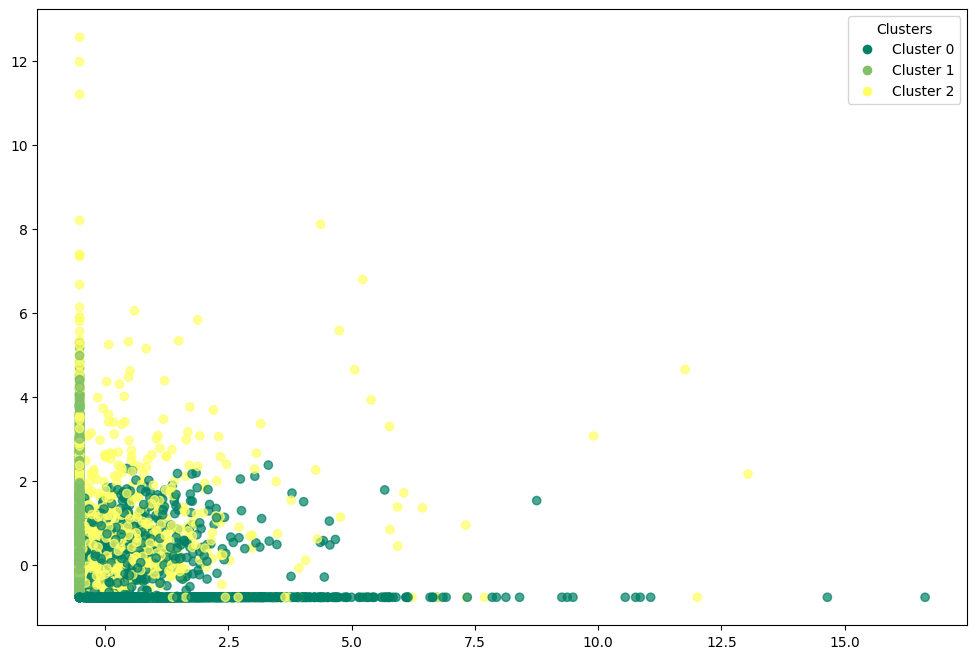

In [131]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [132]:
sil = silhouette_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])
ch = calinski_harabasz_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])
db = davies_bouldin_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.1265745629872508
Calinski-Harabasz: 1038.51439726153
Davies-Bouldin: 3.572776785750482


### GMM with pca

In [133]:
gmm_pca = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [134]:
gmm_pca.fit(X_pca)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [135]:
df_pca_gmm = X_pca.copy()

In [136]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [137]:
df_pca_gmm

dim_1     dim_2     dim_3  gmm_pca
0     -0.040674  2.820321  0.684454        2
1     -0.244152  0.316540 -0.256096        1
2     -0.595915 -0.518675 -0.212329        1
3      0.197555  0.380670 -0.761742        1
4     -0.553223 -0.095653 -0.455163        1
...         ...       ...       ...      ...
12314  0.335709 -0.748509 -0.213732        0
12315 -1.384495 -1.834541 -0.019789        0
12316 -1.108424 -1.650076 -0.083421        0
12317 -0.198478 -1.051451  0.181784        0
12318  1.352365 -1.334209  0.875923        0

[12319 rows x 4 columns]

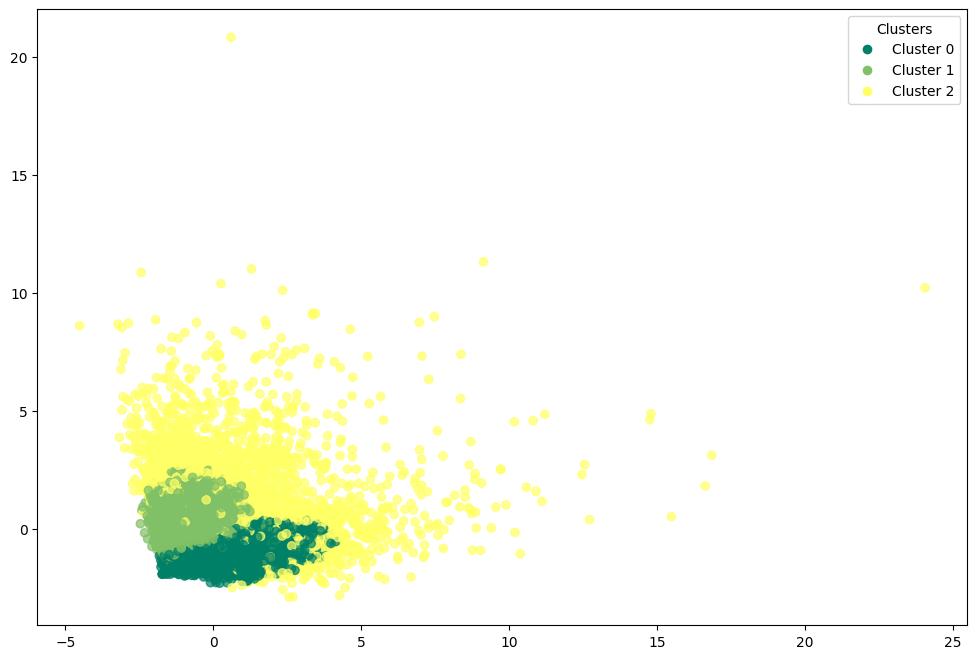

In [138]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [139]:
sil = silhouette_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])
ch = calinski_harabasz_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])
db = davies_bouldin_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.24635292234855005
Calinski-Harabasz: 2872.714259887336
Davies-Bouldin: 1.5855218406043863


### GMM with t-SNE

In [140]:
gmm_tsne = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [141]:
gmm_tsne.fit(X_tsne)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [142]:
df_tsne_gmm = X_tsne.copy()

In [143]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [144]:
df_tsne_gmm

dim_1      dim_2      dim_3  gmm_tsne
0       0.114398  15.308081   3.798611         1
1      -4.878120   6.875067   0.017055         1
2      -3.362962  -4.213982 -11.975272         1
3       5.654139   4.710896  -5.623894         0
4      -0.038726   3.743821  -3.271671         1
...          ...        ...        ...       ...
12314   1.112029  -6.681534  -3.629851         2
12315  -9.000318 -19.503206  -1.040037         2
12316  -6.394584 -19.827484  -3.920771         2
12317   3.622711  -6.261943  11.472353         2
12318  20.509632 -11.151525   8.814960         0

[12319 rows x 4 columns]

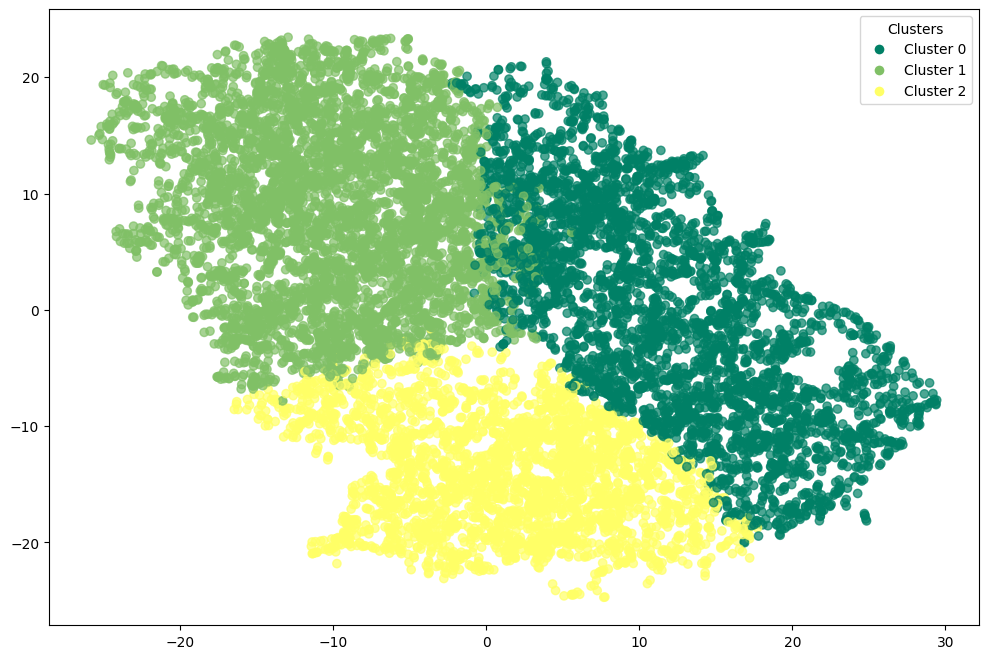

In [145]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [146]:
sil = silhouette_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])
ch = calinski_harabasz_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])
db = davies_bouldin_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.28196588158607483
Calinski-Harabasz: 5992.954979551907
Davies-Bouldin: 1.29998503843383


### GMM with umap

In [147]:
gmm_umap = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [148]:
gmm_umap.fit(X_umap)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [149]:
df_umap_gmm = X_umap.copy()

In [150]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [151]:
df_umap_gmm

dim_1     dim_2      dim_3  gmm_umap
0      8.773307  4.291425   7.520591         1
1      8.937214  5.686240   9.205293         1
2      8.090482  6.291761  10.432554         1
3      8.340221  5.067367  10.147958         1
4      8.194123  5.613099   9.675292         1
...         ...       ...        ...       ...
12314  1.797643  6.107162   7.769608         2
12315 -0.031510  9.054818   6.380892         2
12316  0.021729  8.755672   6.955832         2
12317  2.031036  6.362990   7.087135         2
12318  0.250902  3.322713   6.356452         2

[12319 rows x 4 columns]

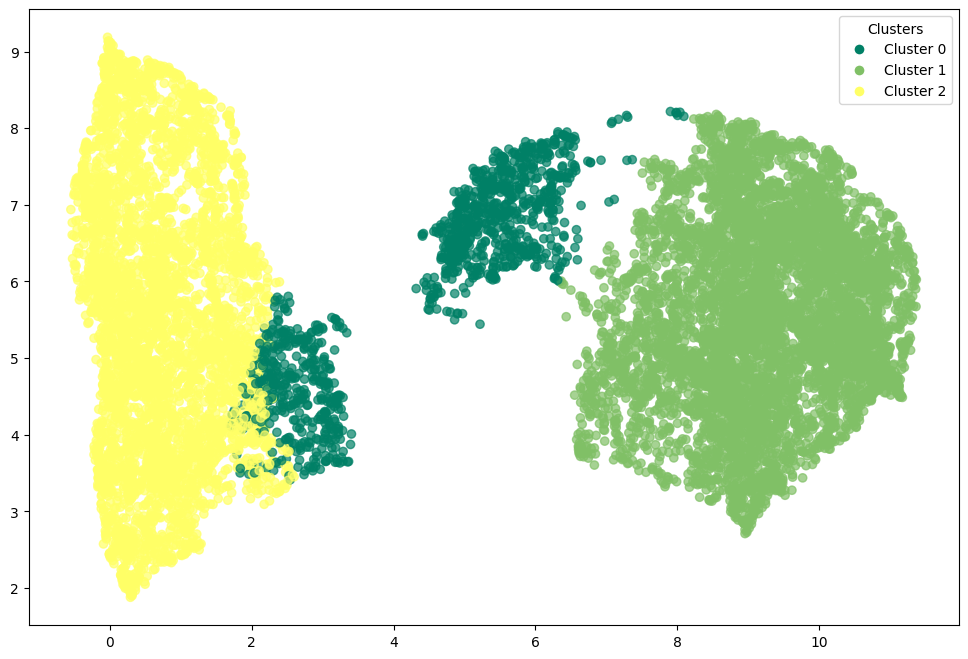

In [152]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [153]:
sil = silhouette_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])
ch = calinski_harabasz_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])
db = davies_bouldin_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.4246423840522766
Calinski-Harabasz: 22156.190294766446
Davies-Bouldin: 0.9467929331569236


## pam

In [154]:
initial_medoids = np.random.choice(len(energy_scaled),N_CLUSTER,replace=False)

In [155]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [156]:
pam = kmedoids(energy_scaled.values.tolist(),initial_medoids,metric=metric)

In [157]:
pam.process()

In [158]:
clusters = pam.get_clusters()

In [159]:
medoids = pam.get_medoids()

In [160]:
labels = np.zeros(len(energy_scaled))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [161]:
df_pam = energy_scaled.copy()

In [162]:
df_pam['pam'] = labels

In [163]:
df_pam

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                   -0.518605             1.036710               0.712677   
1                   -0.518605             0.022685               0.700733   
2                   -0.518605            -0.610802              -0.094832   
3                   -0.518605             0.905708               0.223716   
4                   -0.518605            -0.074683               0.178024   
...                       ...                  ...                    ...   
12314                0.002562            -0.776720              -0.695837   
12315               -0.414364            -0.776720              -0.695837   
12316               -0.518605            -0.776720              -0.695837   
12317               -0.124951            -0.776720              -0.695837   
12318                0.111607            -0.776720              -0.695837   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 3.254780               -0.294753             -0.451513   
1                 0.361211               -0.294753              0.417658   
2                -0.440085                0.552061             -0.529009   
3                -0.440085               -0.294753              0.545950   
4                -0.440085               -0.294753             -0.480799   
...                    ...                     ...                   ...   
12314            -0.440085               -0.294753             -0.541066   
12315            -0.440085               -0.294753             -0.352305   
12316            -0.440085               -0.294753             -0.250082   
12317            -0.440085               -0.294753             -0.242909   
12318            -0.440085               -0.294753              2.617870   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  0.390188                   0.501495              0.025226   
1                 -0.329103                  -0.372616              0.285323   
2                  0.364396                  -0.728603              0.644382   
3                  0.974712                  -0.653975              0.458547   
4                  0.272112                   0.414273             -0.515152   
...                     ...                        ...                   ...   
12314              0.377318                   0.309472              0.038656   
12315             -0.869413                  -1.275782             -0.737050   
12316             -0.701802                  -0.969270             -0.497817   
12317              0.656418                   0.207987             -0.592642   
12318              0.422701                  -0.139171              0.225969   

       Tot_appliances_elec_EUI  pam  
0                     1.702697  1.0  
1                     0.136646  1.0  
2                    -0.911863  2.0  
3                     0.271896  1.0  
4                    -0.519513  1.0  
...                        ...  ...  
12314                -0.107970  2.0  
12315                -0.937584  2.0  
12316                -0.862524  2.0  
12317                -0.864528  2.0  
12318                -0.189590  0.0  

[12319 rows x 11 columns]

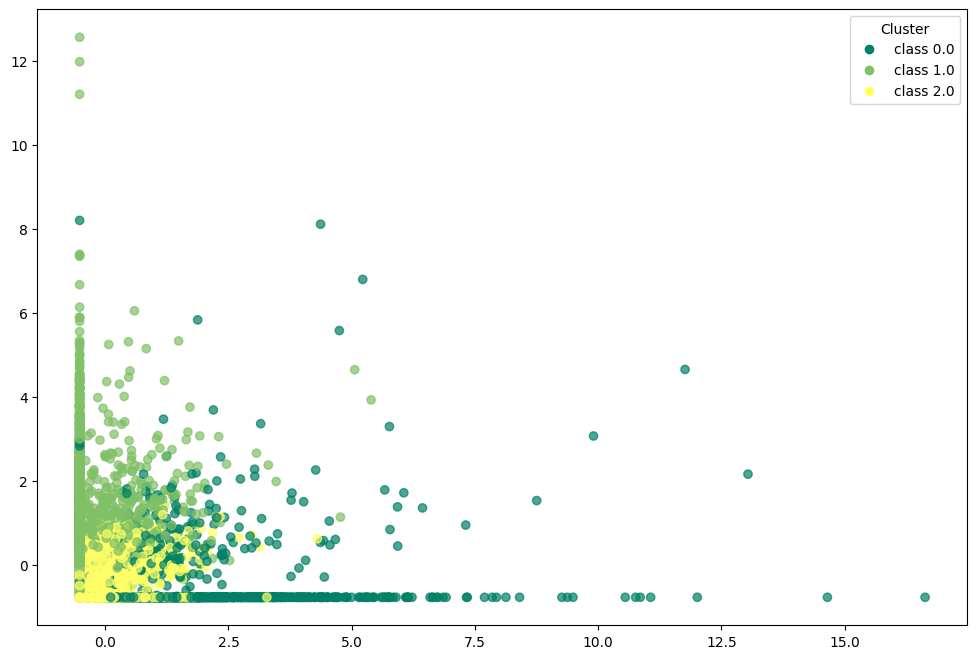

In [164]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [165]:
sil = silhouette_score(df_pam.iloc[:,:-1], df_pam['pam'])
ch = calinski_harabasz_score(df_pam.iloc[:,:-1], df_pam['pam'])
db = davies_bouldin_score(df_pam.iloc[:,:-1], df_pam['pam'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.11836313578298578
Calinski-Harabasz: 1845.6449583645926
Davies-Bouldin: 1.7763325514733665


### pam with pca

In [166]:
initial_medoids = np.random.choice(len(X_pca),N_CLUSTER,replace=False)

In [167]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [168]:
pam_pca = kmedoids(X_pca.values.tolist(),initial_medoids,metric=metric)

In [169]:
pam_pca.process()

In [170]:
clusters = pam_pca.get_clusters()

In [171]:
medoids = pam_pca.get_medoids()

In [172]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [173]:
df_pam_pca = X_pca.copy()

In [174]:
df_pam_pca['pam_pca'] = labels

In [175]:
df_pam_pca

dim_1     dim_2     dim_3  pam_pca
0     -0.040674  2.820321  0.684454      1.0
1     -0.244152  0.316540 -0.256096      1.0
2     -0.595915 -0.518675 -0.212329      2.0
3      0.197555  0.380670 -0.761742      1.0
4     -0.553223 -0.095653 -0.455163      1.0
...         ...       ...       ...      ...
12314  0.335709 -0.748509 -0.213732      2.0
12315 -1.384495 -1.834541 -0.019789      2.0
12316 -1.108424 -1.650076 -0.083421      2.0
12317 -0.198478 -1.051451  0.181784      2.0
12318  1.352365 -1.334209  0.875923      0.0

[12319 rows x 4 columns]

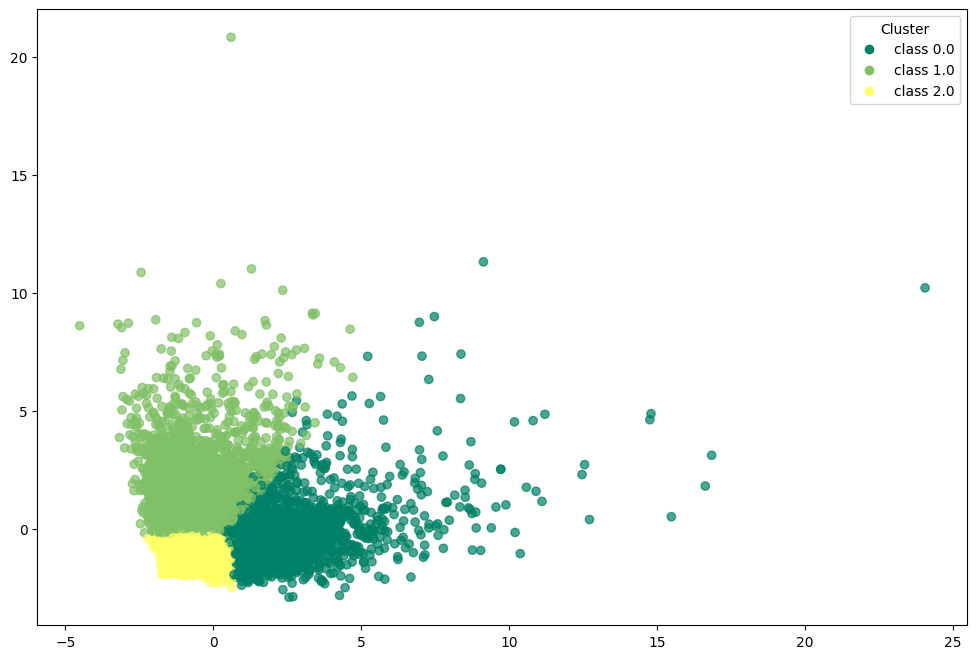

In [176]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [177]:
sil = silhouette_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])
ch = calinski_harabasz_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])
db = davies_bouldin_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.2544067076101512
Calinski-Harabasz: 4252.457762925734
Davies-Bouldin: 1.1235597696287811


### pam with t-SNE

In [178]:
initial_medoids = np.random.choice(len(X_tsne),N_CLUSTER,replace=False)

In [179]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [180]:
pam_tsne = kmedoids(X_tsne.values.tolist(),initial_medoids,metric=metric)

In [181]:
pam_tsne.process()

In [182]:
clusters = pam_tsne.get_clusters()

In [183]:
medoids = pam_tsne.get_medoids()

In [184]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [185]:
df_pam_tsne = X_tsne.copy()

In [186]:
df_pam_tsne['pam_tsne'] = labels

In [187]:
df_pam_tsne

dim_1      dim_2      dim_3  pam_tsne
0       0.114398  15.308081   3.798611       2.0
1      -4.878120   6.875067   0.017055       0.0
2      -3.362962  -4.213982 -11.975272       0.0
3       5.654139   4.710896  -5.623894       0.0
4      -0.038726   3.743821  -3.271671       0.0
...          ...        ...        ...       ...
12314   1.112029  -6.681534  -3.629851       1.0
12315  -9.000318 -19.503206  -1.040037       1.0
12316  -6.394584 -19.827484  -3.920771       1.0
12317   3.622711  -6.261943  11.472353       1.0
12318  20.509632 -11.151525   8.814960       1.0

[12319 rows x 4 columns]

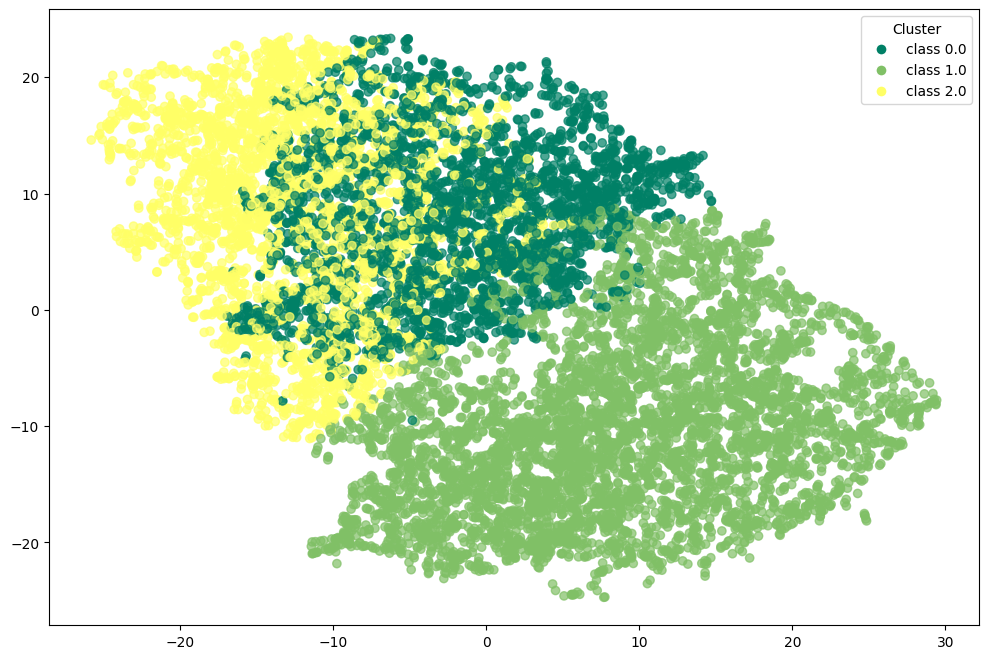

In [188]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [189]:
sil = silhouette_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])
ch = calinski_harabasz_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])
db = davies_bouldin_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.320354700088501
Calinski-Harabasz: 7482.36741607187
Davies-Bouldin: 1.1437035075963813


### pam with umap

In [190]:
initial_medoids = np.random.choice(len(X_umap),N_CLUSTER,replace=False)

In [191]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [192]:
pam_umap = kmedoids(X_umap.values.tolist(),initial_medoids,metric=metric)

In [193]:
pam_umap.process()

In [194]:
clusters = pam_umap.get_clusters()

In [195]:
medoids = pam_umap.get_medoids()

In [196]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [197]:
df_pam_umap = X_umap.copy()

In [198]:
df_pam_umap['pam_umap'] = labels

In [199]:
df_pam_umap

dim_1     dim_2      dim_3  pam_umap
0      8.773307  4.291425   7.520591       0.0
1      8.937214  5.686240   9.205293       0.0
2      8.090482  6.291761  10.432554       0.0
3      8.340221  5.067367  10.147958       0.0
4      8.194123  5.613099   9.675292       0.0
...         ...       ...        ...       ...
12314  1.797643  6.107162   7.769608       1.0
12315 -0.031510  9.054818   6.380892       1.0
12316  0.021729  8.755672   6.955832       1.0
12317  2.031036  6.362990   7.087135       1.0
12318  0.250902  3.322713   6.356452       2.0

[12319 rows x 4 columns]

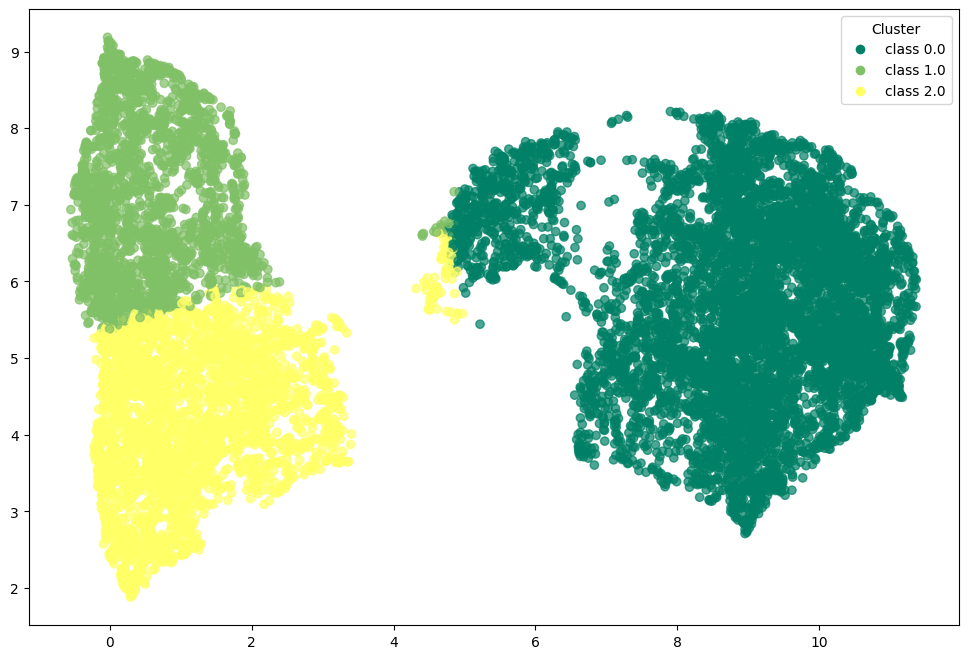

In [200]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [201]:
sil = silhouette_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])
ch = calinski_harabasz_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])
db = davies_bouldin_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.5122557878494263
Calinski-Harabasz: 23697.696585753067
Davies-Bouldin: 0.8440409563720883


## spectral clustering

In [202]:
spectral_clustering = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [203]:
spectral_clustering.fit(energy_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [204]:
df_spectral = energy_scaled.copy()

In [205]:
df_spectral['spectral_clustering'] = spectral_clustering.labels_

In [206]:
df_spectral

Tot_waterheat_elec_EUI  Tot_heating_gas_EUI  Tot_waterheat_gas_EUI  \
0                   -0.518605             1.036710               0.712677   
1                   -0.518605             0.022685               0.700733   
2                   -0.518605            -0.610802              -0.094832   
3                   -0.518605             0.905708               0.223716   
4                   -0.518605            -0.074683               0.178024   
...                       ...                  ...                    ...   
12314                0.002562            -0.776720              -0.695837   
12315               -0.414364            -0.776720              -0.695837   
12316               -0.518605            -0.776720              -0.695837   
12317               -0.124951            -0.776720              -0.695837   
12318                0.111607            -0.776720              -0.695837   

       Tot_cooking_gas_EUI  Tot_appliances_gas_EUI  Tot_heating_elec_EUI  \
0                 3.254780               -0.294753             -0.451513   
1                 0.361211               -0.294753              0.417658   
2                -0.440085                0.552061             -0.529009   
3                -0.440085               -0.294753              0.545950   
4                -0.440085               -0.294753             -0.480799   
...                    ...                     ...                   ...   
12314            -0.440085               -0.294753             -0.541066   
12315            -0.440085               -0.294753             -0.352305   
12316            -0.440085               -0.294753             -0.250082   
12317            -0.440085               -0.294753             -0.242909   
12318            -0.440085               -0.294753              2.617870   

       Tot_cooling_elec_EUI  Tot_refrigeretor_elec_EUI  Tot_cooking_elec_EUI  \
0                  0.390188                   0.501495              0.025226   
1                 -0.329103                  -0.372616              0.285323   
2                  0.364396                  -0.728603              0.644382   
3                  0.974712                  -0.653975              0.458547   
4                  0.272112                   0.414273             -0.515152   
...                     ...                        ...                   ...   
12314              0.377318                   0.309472              0.038656   
12315             -0.869413                  -1.275782             -0.737050   
12316             -0.701802                  -0.969270             -0.497817   
12317              0.656418                   0.207987             -0.592642   
12318              0.422701                  -0.139171              0.225969   

       Tot_appliances_elec_EUI  spectral_clustering  
0                     1.702697                    0  
1                     0.136646                    0  
2                    -0.911863                    0  
3                     0.271896                    0  
4                    -0.519513                    0  
...                        ...                  ...  
12314                -0.107970                    2  
12315                -0.937584                    1  
12316                -0.862524                    1  
12317                -0.864528                    1  
12318                -0.189590                    2  

[12319 rows x 11 columns]

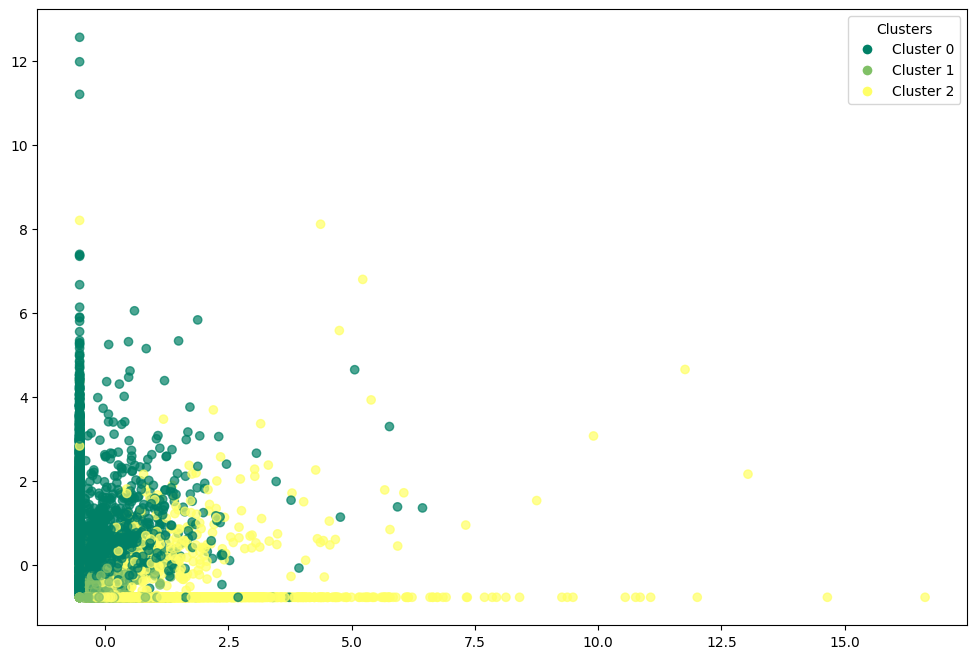

In [207]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_spectral.iloc[:, 0], df_spectral.iloc[:, 1], 
                      c=df_spectral['spectral_clustering'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_spectral['spectral_clustering'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [208]:
sil = silhouette_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])
ch = calinski_harabasz_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])
db = davies_bouldin_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.008830891983146913
Calinski-Harabasz: 1465.2777422272827
Davies-Bouldin: 1.7592658820729798


### spectral clustering with pca

In [209]:
spectral_pca = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [210]:
spectral_pca.fit(X_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [211]:
df_pca_spectral = X_pca.copy()

In [212]:
df_pca_spectral["spectral_pca"] = spectral_pca.labels_

In [213]:
df_pca_spectral

dim_1     dim_2     dim_3  spectral_pca
0     -0.040674  2.820321  0.684454             1
1     -0.244152  0.316540 -0.256096             1
2     -0.595915 -0.518675 -0.212329             1
3      0.197555  0.380670 -0.761742             1
4     -0.553223 -0.095653 -0.455163             1
...         ...       ...       ...           ...
12314  0.335709 -0.748509 -0.213732             2
12315 -1.384495 -1.834541 -0.019789             0
12316 -1.108424 -1.650076 -0.083421             0
12317 -0.198478 -1.051451  0.181784             0
12318  1.352365 -1.334209  0.875923             2

[12319 rows x 4 columns]

### spectral clustering with t-SNE

In [214]:
spectral_tsne = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [215]:
spectral_tsne.fit(X_tsne)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [216]:
df_tsne_spectral = X_tsne.copy()

In [217]:
df_tsne_spectral['spectral_tsne'] = spectral_tsne.labels_

In [218]:
df_tsne_spectral

dim_1      dim_2      dim_3  spectral_tsne
0       0.114398  15.308081   3.798611              0
1      -4.878120   6.875067   0.017055              0
2      -3.362962  -4.213982 -11.975272              0
3       5.654139   4.710896  -5.623894              0
4      -0.038726   3.743821  -3.271671              0
...          ...        ...        ...            ...
12314   1.112029  -6.681534  -3.629851              2
12315  -9.000318 -19.503206  -1.040037              2
12316  -6.394584 -19.827484  -3.920771              2
12317   3.622711  -6.261943  11.472353              2
12318  20.509632 -11.151525   8.814960              2

[12319 rows x 4 columns]

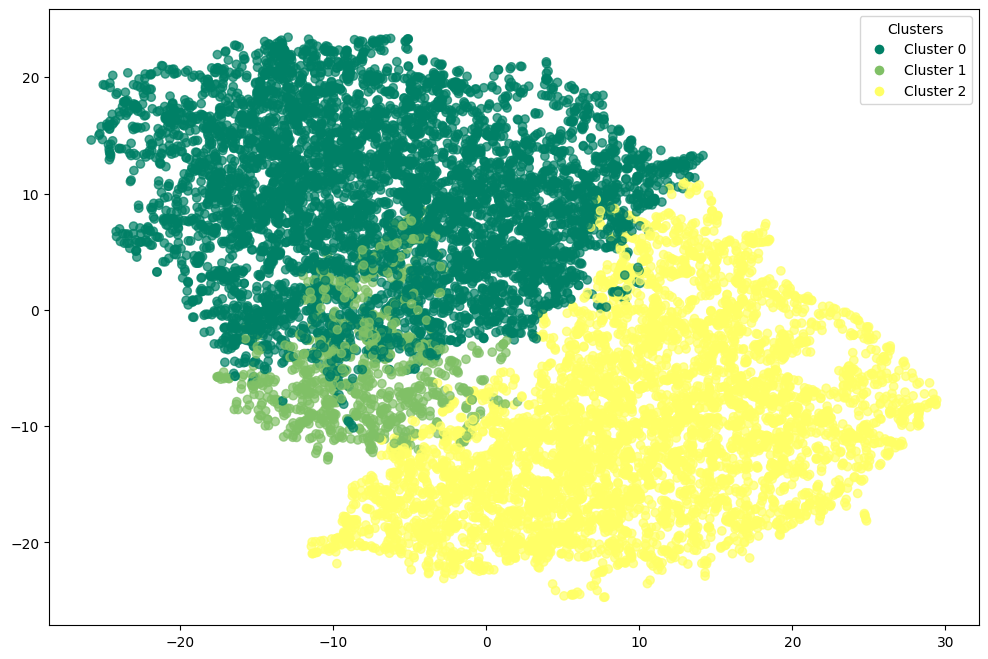

In [219]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['spectral_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_spectral['spectral_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [220]:
sil = silhouette_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])
ch = calinski_harabasz_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])
db = davies_bouldin_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.24237926304340363
Calinski-Harabasz: 5699.615509629228
Davies-Bouldin: 1.0382838069887539


### spectral clustering with umap

In [221]:
spectral_umap = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [222]:
spectral_umap.fit(X_umap)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [223]:
df_umap_spectral = X_umap.copy()

In [224]:
df_umap_spectral['spectral_umap'] = spectral_umap.labels_

In [225]:
df_umap_spectral

dim_1     dim_2      dim_3  spectral_umap
0      8.773307  4.291425   7.520591              1
1      8.937214  5.686240   9.205293              1
2      8.090482  6.291761  10.432554              1
3      8.340221  5.067367  10.147958              1
4      8.194123  5.613099   9.675292              1
...         ...       ...        ...            ...
12314  1.797643  6.107162   7.769608              0
12315 -0.031510  9.054818   6.380892              0
12316  0.021729  8.755672   6.955832              0
12317  2.031036  6.362990   7.087135              0
12318  0.250902  3.322713   6.356452              0

[12319 rows x 4 columns]

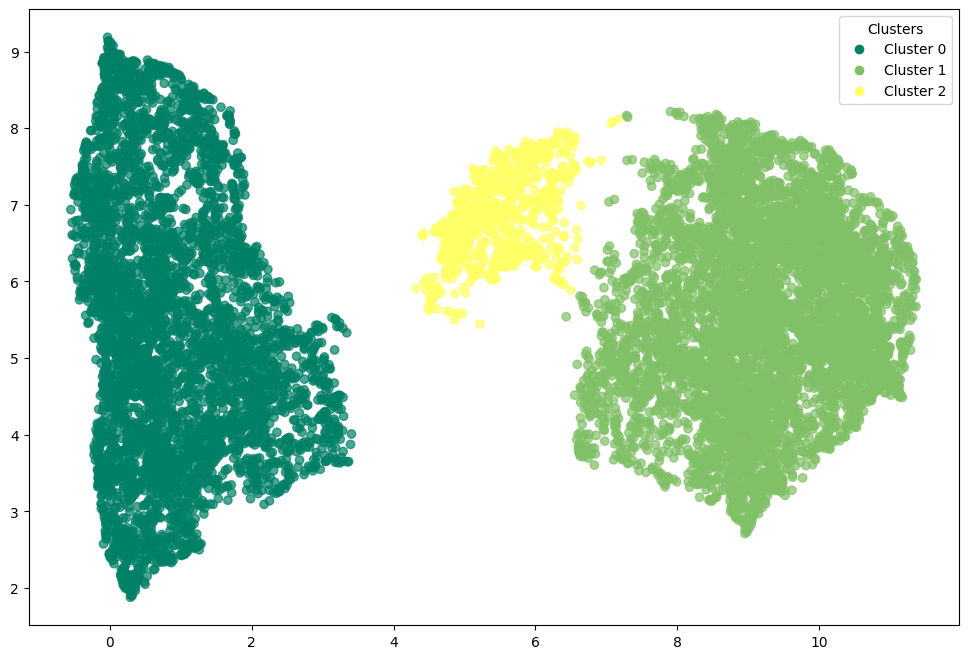

In [226]:
plt.figure(figsize=(12,8)) 
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['spectral_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_spectral['spectral_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [227]:
sil = silhouette_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])
ch = calinski_harabasz_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])
db = davies_bouldin_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.4208867847919464
Calinski-Harabasz: 23307.203972112253
Davies-Bouldin: 0.6700825540380698


# internal measures

In [228]:
results = {}

def evaluate_clustering(X, y_pred):

    scores = {
        "Silhouette": silhouette_score(X, y_pred),
        "Davies Bouldin": davies_bouldin_score(X, y_pred),
        "Calinski Harabasz": calinski_harabasz_score(X, y_pred),
        
    }
    return scores

def evaluate_and_store(name, X, y_pred):
    scores = evaluate_clustering(X, y_pred)
    results[name] = scores

# k-means
evaluate_and_store("k-means",df_kmeans.drop(['k_means'],axis=1).values,df_kmeans['k_means'])

evaluate_and_store("k-means + pca",df_pca_kmeans.drop(['kmeans_pca'],axis=1).values,df_pca_kmeans['kmeans_pca'])

evaluate_and_store("k-means + tsne",df_tsne_kmeans.drop(['kmeans_tsne'],axis=1).values,df_tsne_kmeans['kmeans_tsne'])

evaluate_and_store("k-means + umap",df_umap_kmeans.drop(['kmeans_umap'],axis=1).values,df_umap_kmeans['kmeans_umap'])

# Birch
evaluate_and_store("Birch",df_birch.drop(['birch'],axis=1).values,df_birch['birch'])

evaluate_and_store("Birch + pca",df_pca_birch.drop(['birch_pca'],axis=1).values,df_pca_birch['birch_pca'])

evaluate_and_store("Birch + tsne",df_tsne_birch.drop(['birch_tsne'],axis=1).values,df_tsne_birch['birch_tsne'])

evaluate_and_store("Birch + umap",df_umap_birch.drop(['birch_umap'],axis=1).values,df_umap_birch['birch_umap'])

# GMM
evaluate_and_store("GMM",df_gmm.drop(['gmm'],axis=1).values,df_gmm['gmm'])

evaluate_and_store("GMM + pca",df_pca_gmm.drop(['gmm_pca'],axis=1).values,df_pca_gmm['gmm_pca'])

evaluate_and_store("GMM + tsne",df_tsne_gmm.drop(['gmm_tsne'],axis=1).values,df_tsne_gmm['gmm_tsne'])

evaluate_and_store("GMM + umap",df_umap_gmm.drop(['gmm_umap'],axis=1).values,df_umap_gmm['gmm_umap'])

# PAM
evaluate_and_store("PAM",df_pam.drop(['pam'],axis=1).values,df_pam['pam'])

evaluate_and_store("PAM + pca",df_pam_pca.drop(['pam_pca'],axis=1).values,df_pam_pca['pam_pca'])

evaluate_and_store("PAM + tsne",df_pam_tsne.drop(['pam_tsne'],axis=1).values,df_pam_tsne['pam_tsne'])

evaluate_and_store("PAM + umap",df_pam_umap.drop(['pam_umap'],axis=1).values,df_pam_umap['pam_umap'])

# Spectral clustering
evaluate_and_store("Spectral Clustering",df_spectral.drop(['spectral_clustering'],axis=1).values,df_spectral['spectral_clustering'])

evaluate_and_store("Spectral Clustering + pca",df_pca_spectral.drop(['spectral_pca'],axis=1).values,df_pca_spectral['spectral_pca'])

evaluate_and_store("Spectral Clustering + tsne",df_tsne_spectral.drop(['spectral_tsne'],axis=1).values,df_tsne_spectral['spectral_tsne'])

evaluate_and_store("Spectral Clustering + umap",df_umap_spectral.drop(['spectral_umap'],axis=1).values,df_umap_spectral['spectral_umap'])


df_results = pd.DataFrame(results).T  
df_results = df_results.round(3)    

print(df_results)

                            Silhouette  Davies Bouldin  Calinski Harabasz
k-means                          0.288           1.740           2092.914
k-means + pca                    0.386           1.095           4943.543
k-means + tsne                   0.310           1.190           6797.330
k-means + umap                   0.514           0.832          23712.905
Birch                            0.427           1.416            799.628
Birch + pca                      0.671           0.783           1367.176
Birch + tsne                     0.260           1.232           5966.627
Birch + umap                     0.422           0.684          23376.788
GMM                              0.127           3.573           1038.514
GMM + pca                        0.246           1.586           2872.714
GMM + tsne                       0.282           1.300           5992.955
GMM + umap                       0.425           0.947          22156.190
PAM                              0.118